In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", None)
pd.set_option('display.float_format', '{:.2f}'.format)

# A. An overview of the dataset

__1. Import the dataset__

In [3]:
file = './data_385k.pkl/data_385k.pkl'
df = pd.read_pickle(file, compression='zip')

__2. Check number of columns and rows__

In [4]:
n_rows, n_columns = df.shape

print(f'The dataset has {n_columns} columns (data fields), and {n_rows} rows (data entries).')

The dataset has 99 columns (data fields), and 385384 rows (data entries).


__3. Display first 5 entries__

In [5]:
df.head()

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,...,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit
0,0.00,8001772000030,NaN,NaN,75.00,37.50,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.00,7610809001066,NaN,NaN,1.50,1.13,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.00,8002530159021,NaN,NaN,52.68,NaN,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.00,3033715065788,NaN,NaN,70.40,11.97,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.00,7610848492740,NaN,NaN,37.00,7.40,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__4. Column datatypes__

In order to create separate lists to hold the names of columns of the same data type, I first check the unique dataypes for all columns. And then use this information to filter out the dtypes series.

In [6]:
dtypes = df.dtypes
dtypes_unique = dtypes.unique()

print(f'The different columns datatypes are :\n{dtypes_unique}')

# Next we create a list of column names corresponding to each datatype
columns_float64 = dtypes[dtypes=='float64']
columns_object = dtypes[dtypes=='object']
columns_int64 = dtypes[dtypes=='int64']

The different columns datatypes are :
[dtype('float64') dtype('O') dtype('int64')]


__5. Type of information contained in columns__

After obtaining a list with all the column names, the lists of column names containing 'per_hundred', 'per_portion' and 'unit' are obtained by using lis comprehensions with a comparison agains these strings. The list of remaining column names are obtained by subtracting sets of these sub-lists from all column names. 

In [7]:
columns = df.columns

cols_per_hundred = [col for col in columns if col[-12:]=='_per_hundred']
cols_per_portion = [col for col in columns if col[-12:]=='_per_portion']
cols_unit = [col for col in columns if col[-5:]=='_unit']
cols_other = list(set(columns) - set(cols_per_hundred) - set(cols_per_portion) - set(cols_unit)) # also contains the 'id' column name

# B. Data Cleaning

__1. Duplicated  products__

In [8]:
# duplicated rows
duplicate_rows = df.duplicated(keep='first')
duplicate_rows.sum()

10500

__Observation__  
- There are 10500 duplicated entries excluding the first occurrence for each repeated row. 

__Solution__  
- Remove the previously identified repeated rows.

In [9]:
df = df.drop_duplicates(keep='first')
df.shape

(374884, 99)

After removing all the deplicates, but keeping a single entry for each repeated row, the new dataset `df_clean_duplicate` contains (385384-10500) = 374884 rows.

__2. Missing values__

__a)__  
We next create the dataframe `df_missing`containing the total number of missing values per column, and respective percentages.

In [10]:
df_missing = df.isna().sum().to_frame(name='missing_total')
df_missing['missing_percentage'] = df_missing['missing_total']/374884*100
df_missing.sort_values('missing_total', ascending=False, inplace=True)
df_missing

,missing_total,missing_percentage
sodium_per_portion,374131,99.80
fiber_insoluble_per_hundred,371375,99.06
fiber_insoluble_unit,371374,99.06
manganese_mn_per_hundred,371350,99.06
manganese_mn_unit,371347,99.06
copper_cu_per_hundred,371273,99.04
copper_cu_unit,371273,99.04
fiber_soluble_per_hundred,371057,98.98
fiber_soluble_unit,371055,98.98
folic_acid_per_hundred,370428,98.81


We observe that for many features the percentage of missing values is very high, above 80% for roughly half of the columns.

__b)__  
Next we'll be using the Missingno library to gain insight into the distribution of missing values

<Axes: >

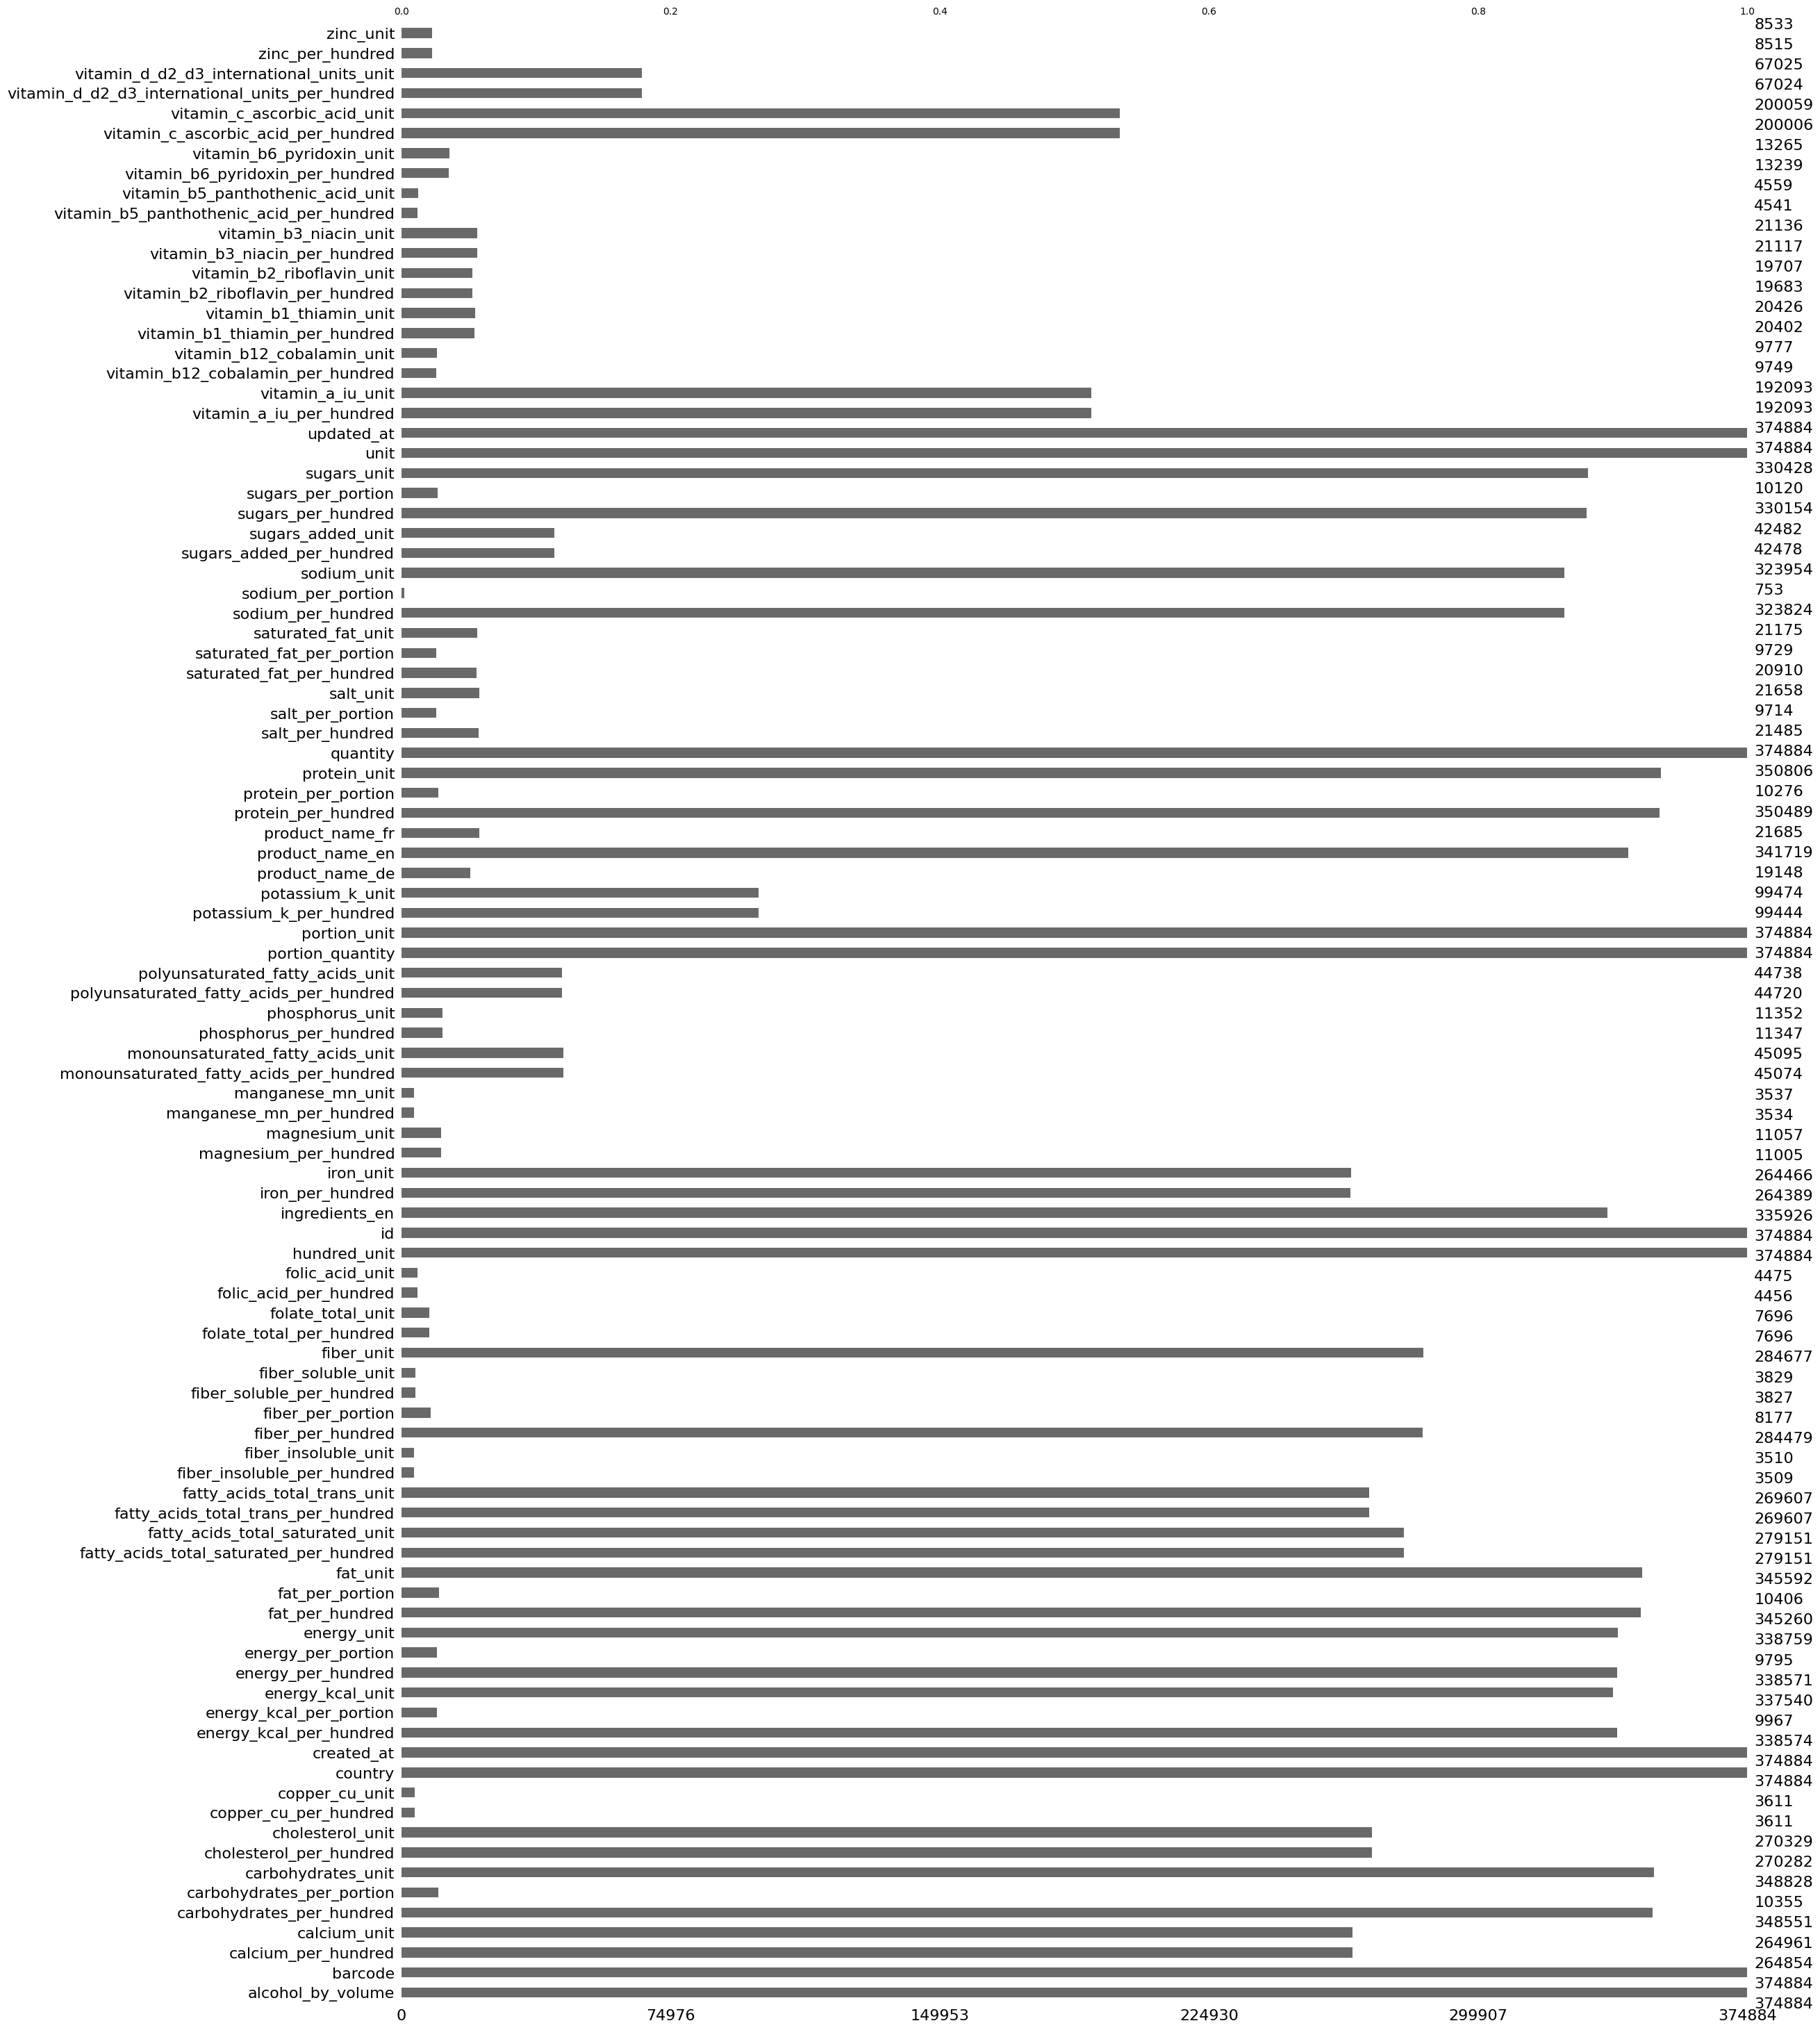

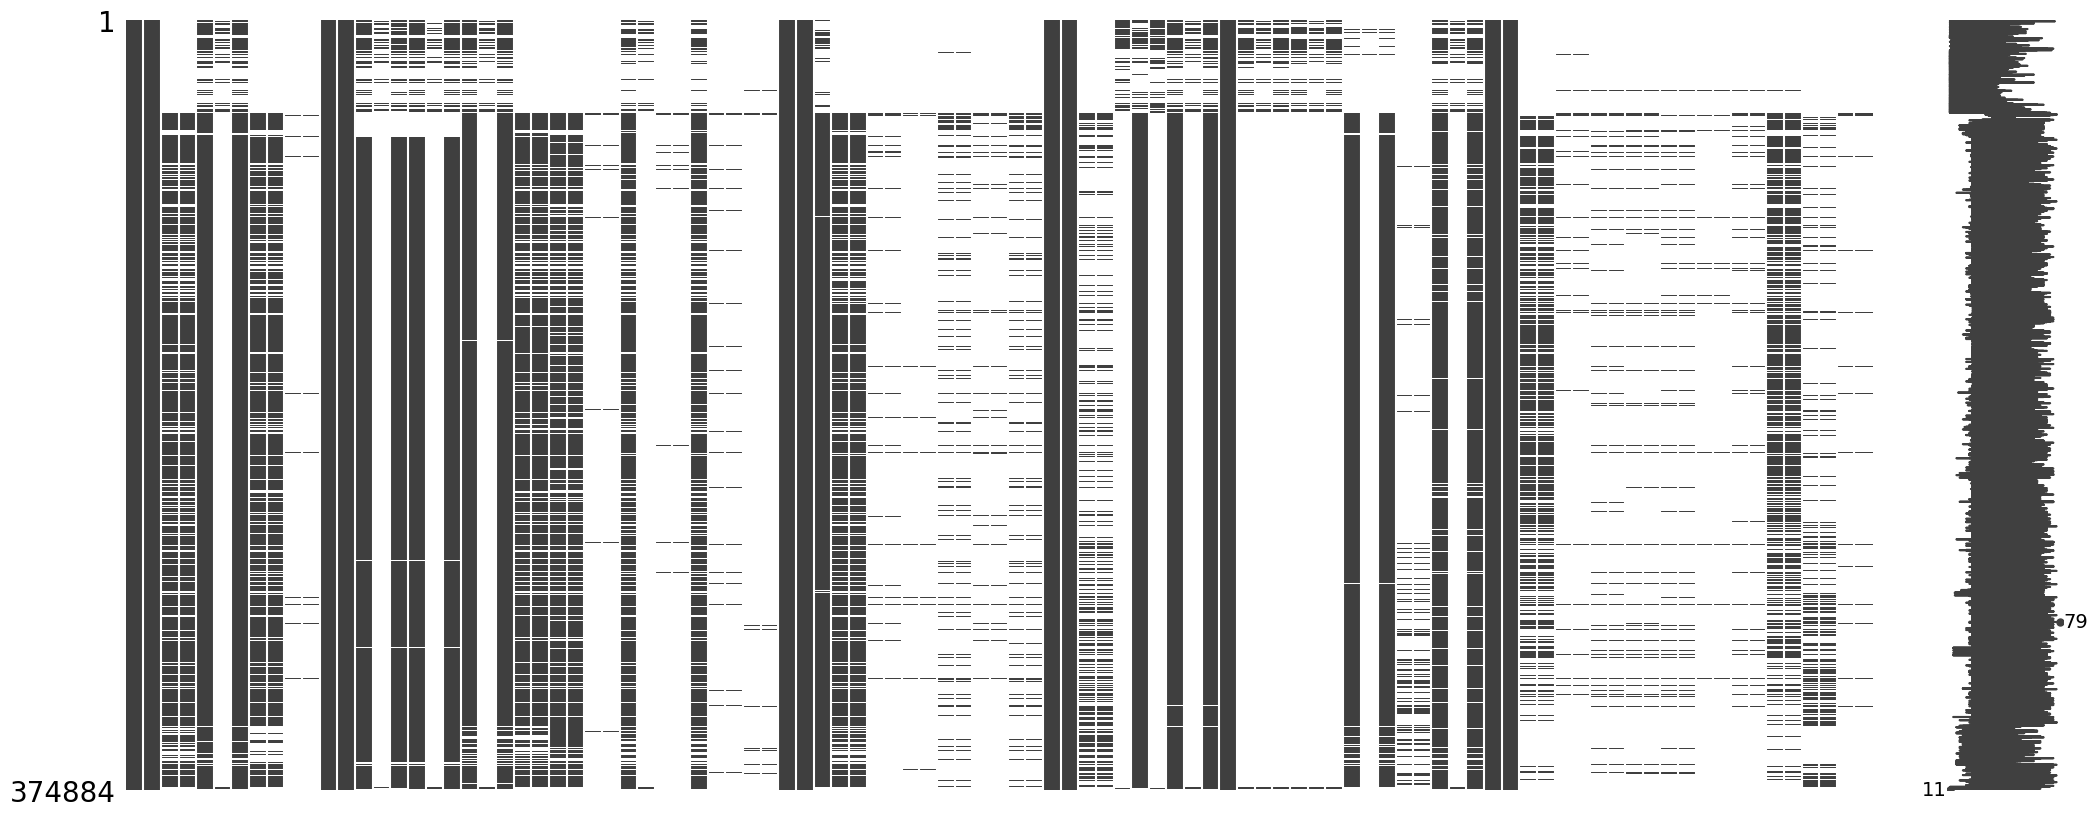

In [11]:
import missingno as msno
msno.bar(df)
msno.matrix(df)

__c)__  
Next we calculate the percentage of missing values for the 4 types of columns previously obtained in task A5 (`_per_hundred`, `_per_portion`, `_unit` and other). We decided to present these as horizontal bar plots, with column name in the y-axis. Since the latter are categorical variables we could not directly use the `sns.barplot` plotting function, but had to use the `sns.catplot`

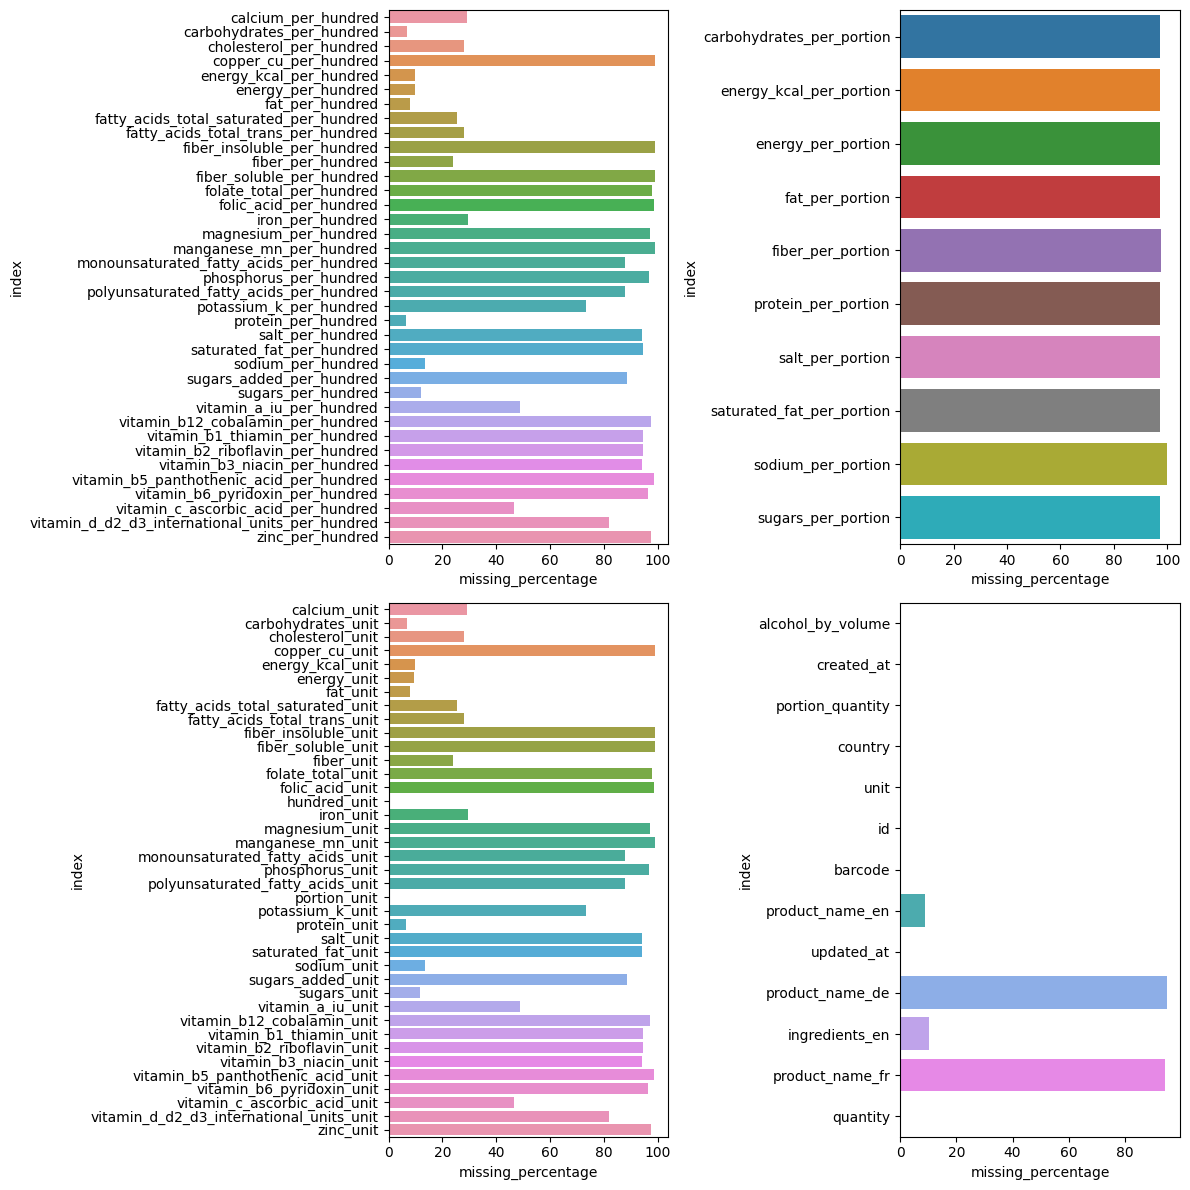

In [12]:
# Creation of auxiliary containing percentage of missing values per column
df_misspercentage = (df.isna().sum() / len(df)*100).to_frame(name='missing_percentage')

# Create a figure with 3 x 2 subplots
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12, 12))

# Loop through these features and plot entries from each feature against `Latitude`
for cols, ax in zip([cols_per_hundred, cols_per_portion, cols_unit, cols_other], axes.ravel()):
    sns.barplot(data=df_misspercentage.loc[cols].reset_index(), 
                y='index',
                x='missing_percentage', 
                ax=ax)

plt.tight_layout()

__3. Cleaning of missing values entries__

__a)__  
We start by checking how many rows and columns are present before any removal, as well as the total number of null values.

In [13]:
df.shape

(374884, 99)

In [14]:
df.isnull().sum().sum()

22405005

Next we remove the rows and columns that are completely empty. And we also check the new number of columns and rows, as well as the number of remaining empty values

In [15]:
df = df.dropna(how='all')
df = df.dropna(how='all', axis=1)

In [16]:
df.shape

(374884, 99)

We observe the number of rows and columns didn't change, which means that there weren't any that were completely empty.

__b)__  
Next we'll see how to best fill the nan values present in categorical columns ending with name ending in `_unit`. We first check the occurrence of difference values in each of these columns.

In [17]:
# cycle through all '_unit' columns
for col in cols_unit:
    print('**************')
    print(df[col].value_counts())   

**************
calcium_unit
mg    264961
Name: count, dtype: int64
**************
carbohydrates_unit
g    348828
Name: count, dtype: int64
**************
cholesterol_unit
mg    270329
Name: count, dtype: int64
**************
copper_cu_unit
mg    3611
Name: count, dtype: int64
**************
energy_kcal_unit
kCal    337540
Name: count, dtype: int64
**************
energy_unit
kJ    338759
Name: count, dtype: int64
**************
fat_unit
g    345592
Name: count, dtype: int64
**************
fatty_acids_total_saturated_unit
g    279151
Name: count, dtype: int64
**************
fatty_acids_total_trans_unit
g    269607
Name: count, dtype: int64
**************
fiber_insoluble_unit
g    3510
Name: count, dtype: int64
**************
fiber_soluble_unit
g    3829
Name: count, dtype: int64
**************
fiber_unit
g    284677
Name: count, dtype: int64
**************
folate_total_unit
µg    7696
Name: count, dtype: int64
**************
folic_acid_unit
µg    4475
Name: count, dtype: int64
**********

__Observation__  
- For the large majority, there's a single value in 'unit'. 
- For the few entries where there are multiple values, the top occuring one is still ~10x more frequent than the second.  

__Solution__  
- Use the most common (or only) value for filling the missing entries

In [18]:
for col in cols_unit:
    df[col].fillna(df[col].mode()[0], inplace=True)

We count again the number of missing values and observe that this was reduced from 22405005 to 13423664. That is 40% of reduction.

In [19]:
df.isnull().sum().sum()

13423664

__c)__  
In order to fill the missing values in the `product_name_en` column, we'll use the missing values of other columns that hold similar information.

In [20]:
df[cols_other].head()

,alcohol_by_volume,created_at,portion_quantity,country,unit,id,barcode,product_name_en,updated_at,product_name_de,ingredients_en,product_name_fr,quantity
0,0.00,2016-06-01T11:42:22.908Z,50.00,CH,g,1000,8001772000030,Bio Spaghetti,2019-10-30T13:46:32.651Z,Bio Spaghetti,Superior quality durum wheat Pasta\r\n\r\nIngr...,Spaghetti Bio,500.00
1,0.00,2016-06-01T11:42:25.111Z,75.00,CH,g,1001,7610809001066,Naturaplan Mozzarella,2019-10-30T13:47:12.174Z,Naturaplan Mozzarella,"Bio Milk (Switzerland), kitchen salt",Naturaplan Mozzarella,150.00
2,0.00,2016-06-01T11:42:25.900Z,0.00,CH,g,1002,8002530159021,Caffè Mauro - Roasted organic coffee blend,2019-10-30T13:48:12.635Z,Caffè Mauro - Bio Kaffe,100% coffee Arabica,Caffè Mauro - café bio,1000.00
3,0.00,2016-06-01T11:42:26.184Z,17.00,CH,g,1003,3033715065788,Le chocolat Cailler - chocolate powder,2019-10-30T13:49:49.816Z,Le chocolat Cailler - schokoladenpulver,"Powdered chocolate 99% (sugar, cocoa), emulsif...",Le chocolat Cailler - chocolat en poudre,500.00
4,0.00,2016-06-01T11:42:26.350Z,20.00,CH,g,1004,7610848492740,Naturaplan Extra Dark Chocolate 70%,2019-10-30T13:50:42.826Z,Naturaplan ExtraDunkle Schokolade 70%,"cocoa paste * (Honduras), raw cane sugar * (Pa...",Naturaplan Chocolat extra noir 70%,100.00


Looking at the available features, the best candidates for finding the correct product name to fill `'product_name_en'` would be the names in either 'product_name_fr' or 'product_name_de'.

In [21]:
df['product_name_en'].fillna(df['product_name_fr'], inplace=True)
df['product_name_en'].fillna(df['product_name_de'], inplace=True)

We count again the number of missing values and observe that this was reduced from 13423664 to 13409365. That is 0.1% of reduction.

In [22]:
df.isnull().sum().sum()

13409365

__d)__  
Next we fill-in the missing values of all the columns `..._per_hundred` with the value of 0, using the assumption that the missing values correspond to products which don't contain the specific ingredient. Before and after the filling, we count the number of missing values in each column.

In [23]:
df['iron_per_hundred'].isnull().sum()

110495

In [24]:
df['iron_per_hundred'].fillna(value=0, inplace=True)

In [25]:
df['iron_per_hundred'].isnull().sum()

0

Missing values in `'iron_per_hundred'` were reduced from 110495 to 0.

We will next apply the same strategy to all the numerical `..._per_hundred` columns. We do this so that in the Section C, when we'll be filtering these features based on their range, the missing values are not filtered out when it could be that their value should be zero (i.e. within range). 

In [26]:
for col_per_hundred in cols_per_hundred:
    df[col_per_hundred].fillna(value=0, inplace=True)

__e)__  
Next we fill the missing values of the column `ingredients_en` with the string `'ingredient_missing'`. As previously, before and after the filling, we count the number of missing values in this column

In [27]:
df['ingredients_en'].isnull().sum()

38958

In [28]:
df['ingredients_en'].fillna(value='ingredient_missing', inplace=True)

In [29]:
df['ingredients_en'].isnull().sum()


0

Missing values in `ingredients_en` before fill is 38958, and after fill is 0

__f)__  
Next we'll drop all columns with more than 95% of missing data. But first we check again the current number of columns as well as the total of missing values.

In [30]:
df.shape

(374884, 99)

In [31]:
df.isnull().sum().sum()

4387349

In [32]:
df_len = len(df)
cols_to_drop = [
    col
    for col in df.columns
    if df[col].isnull().sum() / df_len > 0.95
]
df.drop(cols_to_drop, axis=1, inplace=True)

In [33]:
df.shape

(374884, 89)

In [34]:
df.isnull().sum().sum()

727801

The number of columns was reduced from 99 to 77, and the number of missing values from 13259912 to 5186785, which is a reduction of 60%.

# C. Preliminary Exploratory Data Analysis (EDA)

__1. Exploring the categorical variable__

We first get a reduced dataframe with categorial columns only

In [35]:
df_cat = df.loc[:,df.dtypes == 'object'].copy()
df_cat.nunique()

barcode                                     374446
calcium_unit                                     1
carbohydrates_unit                               1
cholesterol_unit                                 1
copper_cu_unit                                   1
country                                          7
created_at                                   46990
energy_kcal_unit                                 1
energy_unit                                      1
fat_unit                                         1
fatty_acids_total_saturated_unit                 1
fatty_acids_total_trans_unit                     1
fiber_insoluble_unit                             1
fiber_soluble_unit                               1
fiber_unit                                       1
folate_total_unit                                1
folic_acid_unit                                  1
hundred_unit                                     3
ingredients_en                              247228
iron_unit                      

Next we want to know the proportion of samples in columns `country` and `unit`, for each category.

In [36]:
pd.options.display.float_format = '{:.4f}'.format

prop_country = df_cat['country'].value_counts()/len(df_cat['country'])*100
prop_country.to_frame(name='percentage')

,percentage
country,
US,87.5708
CH,8.8339
DE,2.8379
IT,0.7253
FR,0.0315
AT,0.0003
UK,0.0003


In [37]:
prop_unit = df_cat['unit'].value_counts()/len(df_cat['unit'])*100
prop_unit.to_frame(name='percentage')

,percentage
unit,
g,86.4908
ml,13.0550
cl,0.2099
l,0.1320
kg,0.0955
dl,0.0077
?,0.0059
Floz,0.0013
Oz,0.0011


__2. Descriptive statistics and plots of the numerical variables__

Below are several descriptive statistics (including min/max and mean, along with std and different percentils) of the numerical columns

In [38]:
df.describe()

,alcohol_by_volume,calcium_per_hundred,carbohydrates_per_hundred,cholesterol_per_hundred,copper_cu_per_hundred,energy_kcal_per_hundred,energy_per_hundred,fat_per_hundred,fatty_acids_total_saturated_per_hundred,fatty_acids_total_trans_per_hundred,...,vitamin_a_iu_per_hundred,vitamin_b12_cobalamin_per_hundred,vitamin_b1_thiamin_per_hundred,vitamin_b2_riboflavin_per_hundred,vitamin_b3_niacin_per_hundred,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b6_pyridoxin_per_hundred,vitamin_c_ascorbic_acid_per_hundred,vitamin_d_d2_d3_international_units_per_hundred,zinc_per_hundred
count,374884.0000,374884.0000,374884.0000,374884.0000,374884.0000,374884.0000,374884.0000,374884.0000,374884.0000,374884.0000,...,374884.0000,374884.0000,374884.0000,374884.0000,374884.0000,374884.0000,374884.0000,374884.0000,374884.0000,374884.0000
mean,0.0279,82.4109,31.6166,42.5241,0.0527,246.0923,1029.1343,11.7014,3.6810,0.0251,...,253.2501,0.4541,0.0504,0.0882,0.5546,0.1626,0.0493,8.3787,2.5363,0.1381
std,0.7691,2150.6630,40.3355,1642.9868,26.9392,258.3521,1079.9908,19.0334,7.6454,1.0902,...,1767.7190,65.4510,3.1540,32.6788,17.4921,38.2776,1.1736,426.3754,31.4508,16.4484
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,4.6700,0.0000,0.0000,53.0000,221.7500,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,0.0000,0.0000,20.0000,0.0000,0.0000,233.0000,974.8700,3.7400,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,0.0000,71.0000,57.1400,10.0000,0.0000,393.0000,1644.3100,18.1800,5.1300,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
max,57.9000,684000.0000,6400.0000,250000.0000,16483.5200,39600.0000,165686.4000,3200.0000,1000.0000,615.3800,...,333333.0000,33898.3100,1111.0000,20000.0000,6785.7100,16920.4700,420.0000,210000.0000,5000.0000,10000.0000


For example, we observe that mean value of `carbohydrates_per_hundred` is 34g, which seems to be a reasonable value. However, we can observe that the maximum is 6400g that must not be correct since this should be limited to 100g. 

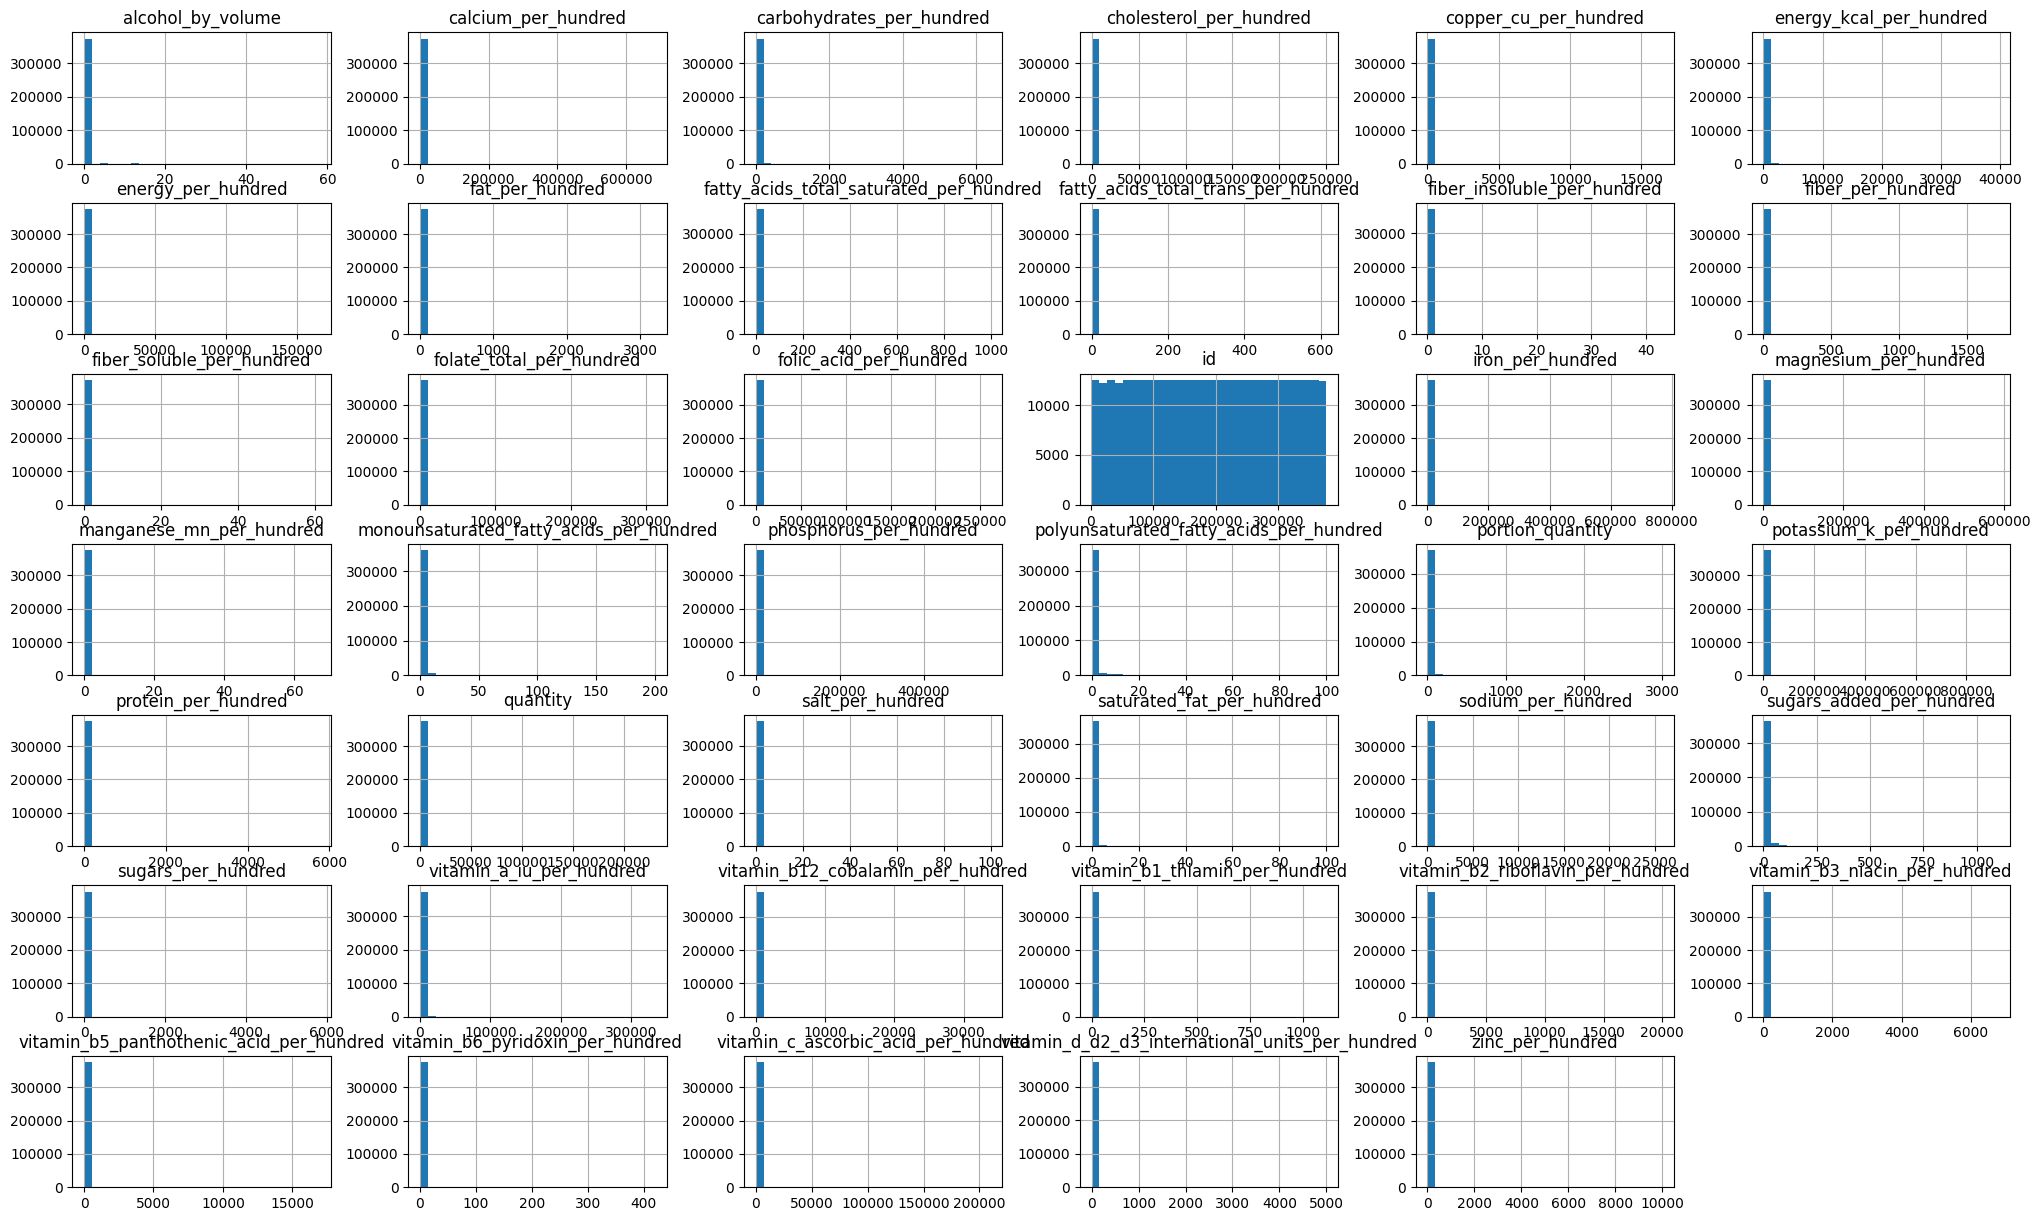

In [39]:
df.hist(bins=30, figsize=(25,15))
plt.show()

The histogram of many variables show that a single or just a few bins around 0 appear to be populated. This is because even though the large majority of values are concentrated in a small range around 0, there are outlier points  located far away from these values. This extends the histograms range resulting in small resolution of the binning. 

The same effect was observed from the descriptive statistics for the cases where the max values are much larger than the mean value plus the standard deviations.

__3. Removal of outliers__

In order to remove the outliers we restrict the values in each `..._per_hundred` column using indicated values. In order to facilitate this task, we first print all columns units and verify that each `..._unit` column contains a single unit for all entries.

In [40]:
for col_per_hundred in cols_per_hundred:
    col_unit = col_per_hundred[:-12]+'_unit'
    if len(df[col_unit].unique()) == 1:
        print(f'{col_per_hundred:50s}: {df[col_unit].unique()[0]}')
    else:
        print(f'{col_unit:50s}: Contains more than 1 unit')

calcium_per_hundred                               : mg
carbohydrates_per_hundred                         : g
cholesterol_per_hundred                           : mg
copper_cu_per_hundred                             : mg
energy_kcal_per_hundred                           : kCal
energy_per_hundred                                : kJ
fat_per_hundred                                   : g
fatty_acids_total_saturated_per_hundred           : g
fatty_acids_total_trans_per_hundred               : g
fiber_insoluble_per_hundred                       : g
fiber_per_hundred                                 : g
fiber_soluble_per_hundred                         : g
folate_total_per_hundred                          : µg
folic_acid_per_hundred                            : µg
iron_per_hundred                                  : mg
magnesium_per_hundred                             : mg
manganese_mn_per_hundred                          : mg
monounsaturated_fatty_acids_per_hundred           : g
phosphorus_per_h

The following function implements the entry selection rules for the different units and type of columns. It returns a Series of booleans indicating the entries that comply with the plausible range of values, for a specific column `..._per_hundred`.

In [41]:
def outlier_rule(df, col_per_hundred, unit):

    if unit == 'g':
        rule = (df[col_per_hundred] >= 0) & (df[col_per_hundred] <= 100)
    elif unit == 'mg':
        rule = (df[col_per_hundred] >= 0) & (df[col_per_hundred] <= 1E5)
    elif unit == 'µg':
        rule = (df[col_per_hundred] >= 0) & (df[col_per_hundred] <= 1E8)
    elif unit == 'kJ':
        rule = (df[col_per_hundred] >= 0) & (df[col_per_hundred] <= 3700)
    elif unit == 'kCal':
        rule = (df[col_per_hundred] >= 0) & (df[col_per_hundred] <= 885)
    elif unit == 'IU':
        if 'vitamin_a' in col_per_hundred:
            rule = (df[col_per_hundred] >= 0) & (df[col_per_hundred] <= 3.3E8)
        elif 'vitamin_d' in col_per_hundred:
            rule = (df[col_per_hundred] >= 0) & (df[col_per_hundred] <= 4E9)
        else:
            print(f'Unit not covered for {col_per_hundred} and {unit}')            
    else:
        print(f'Unit not covered for {col_per_hundred} and {unit}')

    return rule

Next we iterate over the several columns  `..._per_hundred` and apply the following processing:
- We obtain the type of `unit`;
- Then we obtain the filtering rule for the column being processed (`mask_new_rule`);
- We perform the bolean `AND` operation between the new rule and accumulated filtering that has already been derived;

In [42]:
df.reset_index(inplace=True)
mask_ranges = pd.Series([True]*len(df))

print(f"{'NUTRIENT COLUMN':50s}: UNIT :  OUT / REMAIN")
print("-"*72)

for col_per_hundred in cols_per_hundred:
    
    # Ignore if  column is not anymore in dataframe
    #if col_per_hundred not in df.columns:
    #    continue
    
    unit = df[f'{col_per_hundred[:-12]}_unit'].unique()[0]
    
    mask_new_rule = outlier_rule(df, col_per_hundred, unit)
    mask_ranges = mask_ranges & mask_new_rule
  
    
    print(f'{col_per_hundred:50s}: {unit:4s} :{(~mask_new_rule).sum():5.0f} / {sum(mask_ranges):6.0f}')

NUTRIENT COLUMN                                   : UNIT :  OUT / REMAIN
------------------------------------------------------------------------
calcium_per_hundred                               : mg   :   18 / 374866
carbohydrates_per_hundred                         : g    : 1076 / 373791
cholesterol_per_hundred                           : mg   :   22 / 373770
copper_cu_per_hundred                             : mg   :    0 / 373770
energy_kcal_per_hundred                           : kCal :  888 / 373193
energy_per_hundred                                : kJ   :  829 / 373191
fat_per_hundred                                   : g    :  136 / 373167
fatty_acids_total_saturated_per_hundred           : g    :   32 / 373154
fatty_acids_total_trans_per_hundred               : g    :    1 / 373153
fiber_insoluble_per_hundred                       : g    :    0 / 373153
fiber_per_hundred                                 : g    :   21 / 373147
fiber_soluble_per_hundred                         :

In the previous printout, the column `OUT` indicates the entries out of range, and `REMAIN` the remaining entries after the cumulative application of the filtering rules. The `REMAIN` values are no the direct subtraction of the off-range entries in any given column, because sometimes the same product may have off-range values on multiple columns.

We finally apply the overall filter mask to our dataframe, and verify the reduction in number of rows is indeed from an initial 374866 to 372837.

In [43]:
df = df.loc[mask_ranges]
df.shape

(372837, 90)

Next we derive again the statistical information for the numerical `..._per_hundred` columns as well as the histograms. The `max` values are now according to the ranges we have previously defined for the different units. The same can be observed in the histograms. E.g. for the `energy_per_hundred` in `kJ` a destribution in the range `[0; 3700]` is clearly visible 

In [44]:
df.describe()

,index,alcohol_by_volume,calcium_per_hundred,carbohydrates_per_hundred,cholesterol_per_hundred,copper_cu_per_hundred,energy_kcal_per_hundred,energy_per_hundred,fat_per_hundred,fatty_acids_total_saturated_per_hundred,...,vitamin_a_iu_per_hundred,vitamin_b12_cobalamin_per_hundred,vitamin_b1_thiamin_per_hundred,vitamin_b2_riboflavin_per_hundred,vitamin_b3_niacin_per_hundred,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b6_pyridoxin_per_hundred,vitamin_c_ascorbic_acid_per_hundred,vitamin_d_d2_d3_international_units_per_hundred,zinc_per_hundred
count,372837.0000,372837.0000,372837.0000,372837.0000,372837.0000,372837.0000,372837.0000,372837.0000,372837.0000,372837.0000,...,372837.0000,372837.0000,372837.0000,372837.0000,372837.0000,372837.0000,372837.0000,372837.0000,372837.0000,372837.0000
mean,186751.9196,0.0281,69.0436,30.9849,30.8096,0.0512,241.7975,1011.5355,11.4958,3.6156,...,253.1849,0.4554,0.0504,0.0883,0.5539,0.1621,0.0492,7.7365,2.5121,0.1367
std,107908.8412,0.7712,440.4632,29.4013,1001.5302,26.9957,195.1046,816.0458,16.3272,6.4949,...,1761.6290,65.6302,3.1625,32.7684,17.5314,38.3820,1.1754,252.0934,30.2350,16.4908
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,93331.0000,0.0000,0.0000,4.7000,0.0000,0.0000,53.0000,221.7500,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,186669.0000,0.0000,0.0000,20.0000,0.0000,0.0000,233.0000,974.8700,3.7000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,280013.0000,0.0000,71.0000,57.1400,10.0000,0.0000,393.0000,1644.3100,18.0000,5.0400,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
max,374883.0000,57.9000,93750.0000,100.0000,100000.0000,16483.5200,885.0000,3700.0000,100.0000,100.0000,...,333333.0000,33898.3100,1111.0000,20000.0000,6785.7100,16920.4700,420.0000,71428.6000,5000.0000,10000.0000


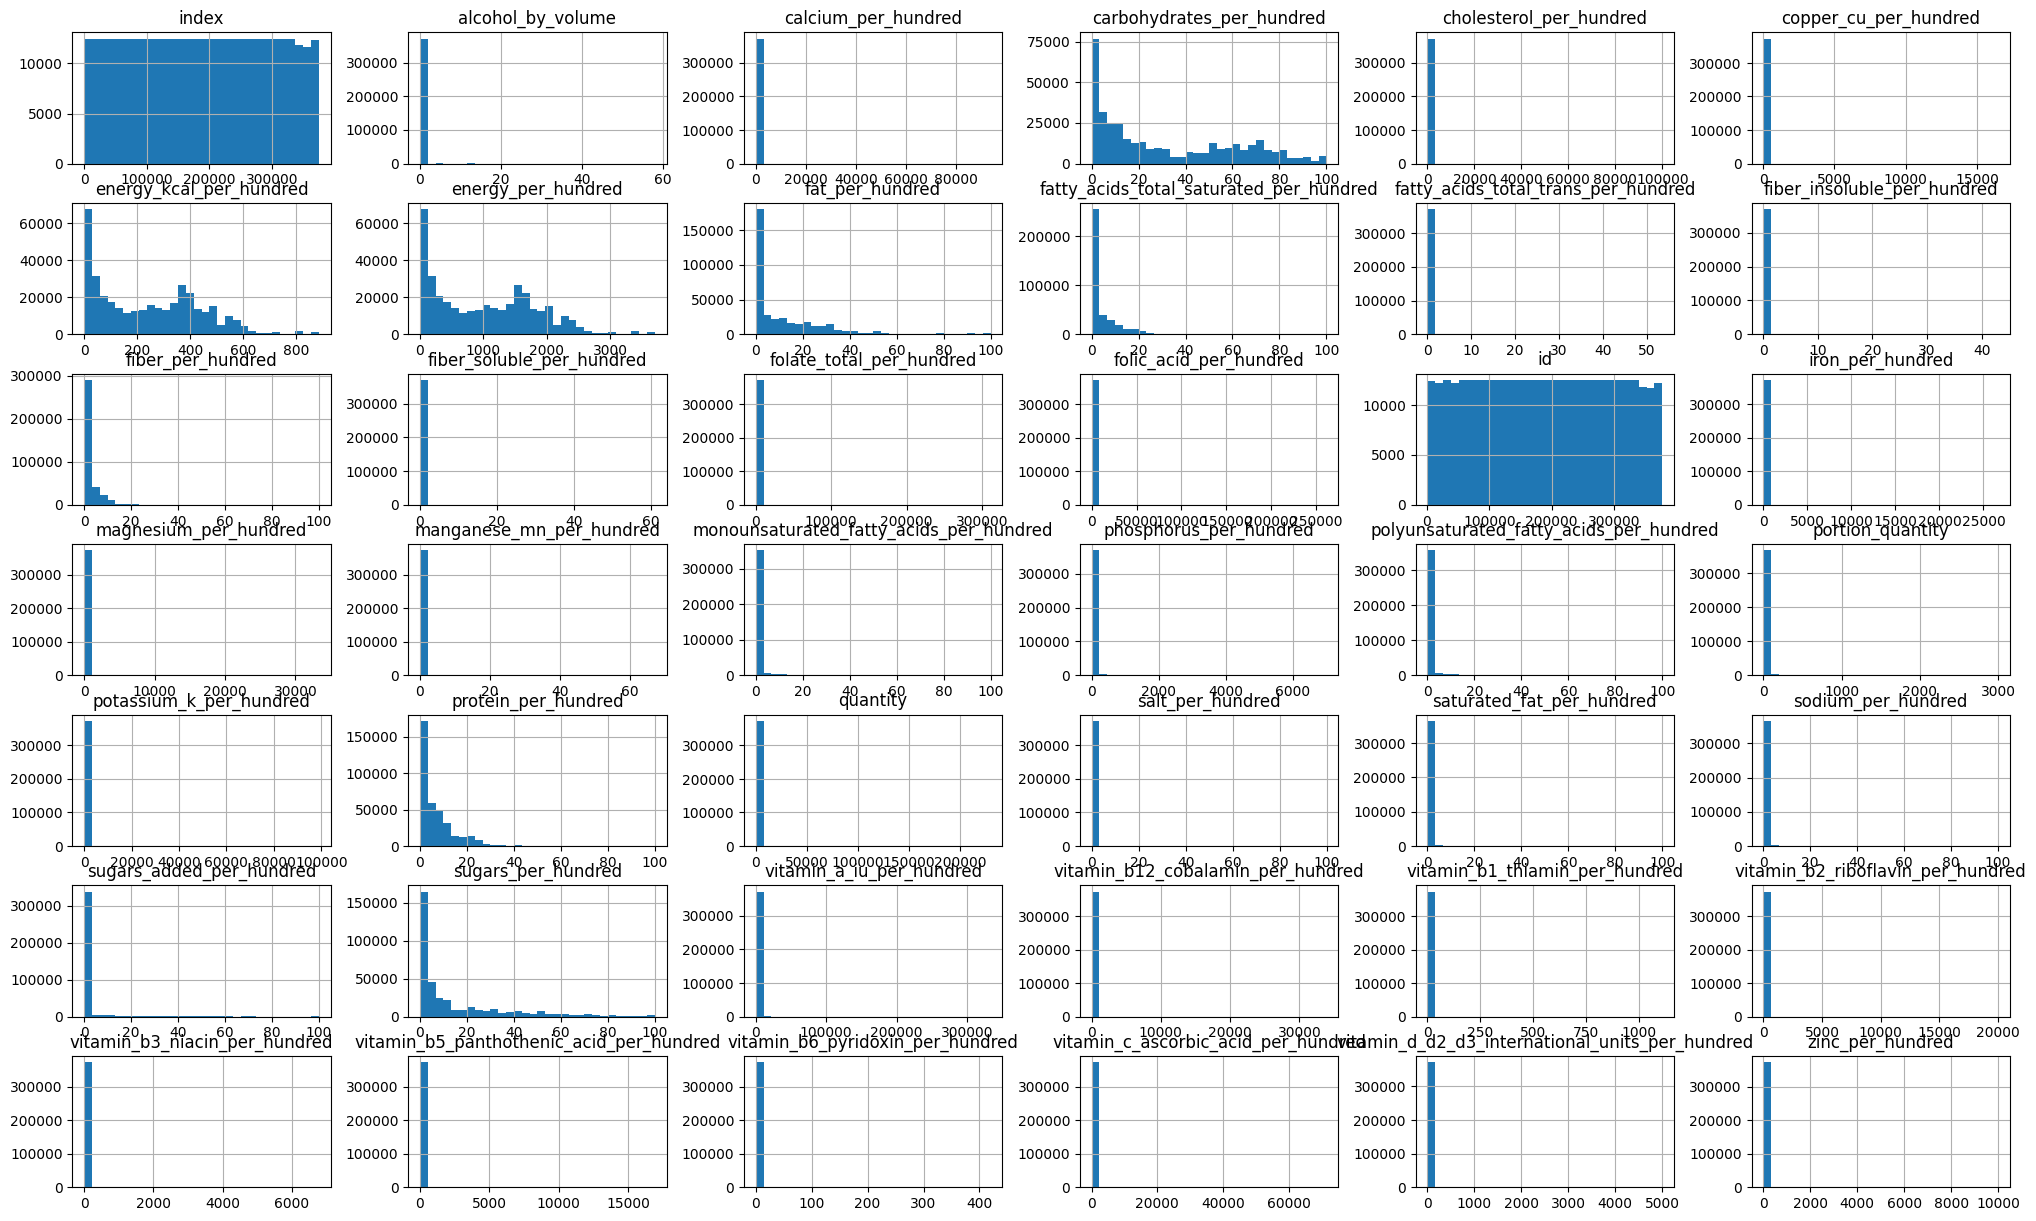

In [45]:
df.hist(bins=30, figsize=(25,15))
plt.show()

__4. Columsn that are dependent on one another__

__a)__  
We start by checking if the macronutrient content adds up to total mass of product. I.e. `fat_per_hundred + protein_per_hundred + carbohydrates_per_hundred + fiber_per_hundred` should add to a maximum of `100g`

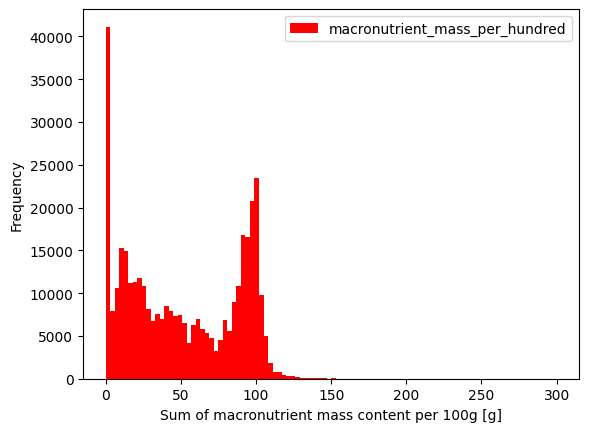

In [46]:
total_macro_mass =  df['fat_per_hundred'] + \
                    df['protein_per_hundred'] + \
                    df['carbohydrates_per_hundred'] + \
                    df['fiber_per_hundred']

df['macronutrient_mass_per_hundred'] = total_macro_mass

ax = df.plot(kind='hist', y='macronutrient_mass_per_hundred', color='r', bins=100)
ax.set_xlabel('Sum of macronutrient mass content per 100g [g]')
plt.show()

__Observation__  
- With a some exceptions, the maximum of the sum of macronutrients is limited to `100g` which is consistent with our expectations;
- There's a clear peak observed at `100g`;
- For many products the total is smaller than `100g`. This could be due to the content of water, alcohol, or other ingredients which are not macronutrients;

__Solution__  
- Filter out all entries with total macronutrient mass above `100g`;

In [47]:
mask_macro_mass =  (total_macro_mass < 100)
df = df[mask_macro_mass]

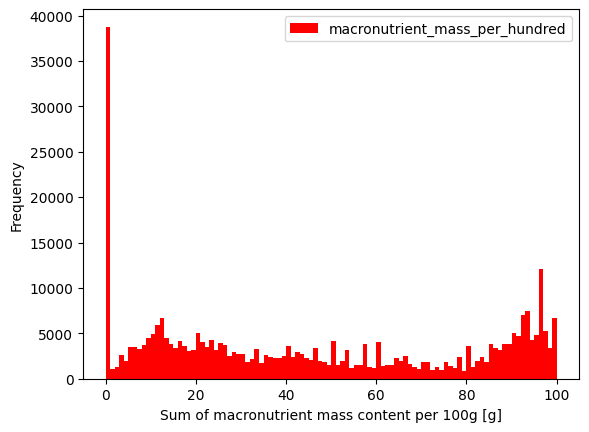

In [48]:
total_macro_mass =  df['fat_per_hundred'] + \
                    df['protein_per_hundred'] + \
                    df['carbohydrates_per_hundred'] + \
                    df['fiber_per_hundred']

df['macronutrient_mass_per_hundred'] = total_macro_mass

ax = df.plot(kind='hist', y='macronutrient_mass_per_hundred', color='r', bins=100)
ax.set_xlabel('Sum of macronutrient mass content per 100g [g]')
plt.show()

After the filtering we can observe a sharp cut-off at `100g`.

In [49]:
df.shape

(336020, 91)

The number of product entries was reduced from 372837 to 336020. This represents a reduction of 10%.

__b)__  
The columns `energy_per_hundred` in `kJ` and the `energy_kcal_per_hundred` in `kcal` should be linearly related. All values should lay over a straight line consistent with the unit conversion `1kcal = 4.184kJ` But in the plot below, we see that this is not the case for many entries.

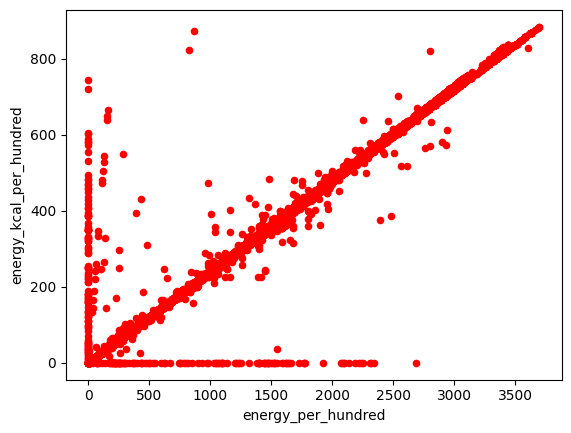

In [50]:
df.plot(kind='scatter', x='energy_per_hundred', y='energy_kcal_per_hundred', color='r')
plt.show()

__Observation__
- We observe inconsistent entries one of the values is equal to zero;
- And when both values don't respect the unit conversion relationship;

__Solution__
- We'll keep only the data points for conversion relationship is respected within a `5%` error margin.

In [51]:
mask_energy_units = np.abs(df['energy_per_hundred']-df['energy_kcal_per_hundred']*4.18)/df['energy_per_hundred'] < 0.05
df = df[mask_energy_units]

Next we plot again the columns `energy_per_hundred` in `kJ` and the `energy_kcal_per_hundred` in `kcal` and verify that indeed all data points are now linearly related.

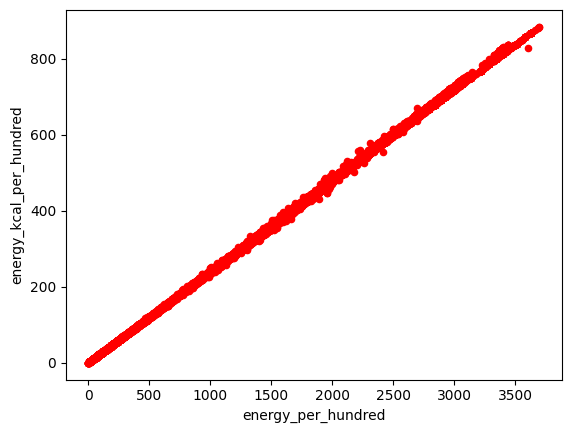

In [52]:
df.plot(kind='scatter', x='energy_per_hundred', y='energy_kcal_per_hundred', color='r')
plt.show()

In [53]:
df.shape

(286414, 91)

This filtering further reduced the number of entries from 336020 to 286414. This is a reduction of 15%.

__c)__  
Finally we check for potential inconsistencies between the given product caloric energy and the sum of energy content per macronutrient obtained using the formula: 

```energy_per_hundred [kJ]= 37* fat_per_hundred[g]+ 17*(protein_per_hundred[g] + carbohydrates_per_hundred[g])```

For this we create a new energy column `energy_macronutrient_per_hundred` obtained as the sum of individual macronutrient contribution to total energy.

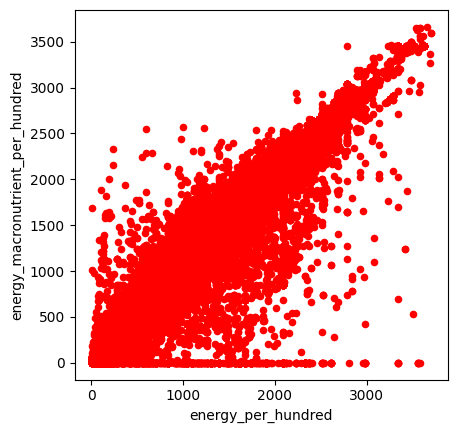

In [54]:
energy_macronutrient =   37*df['fat_per_hundred'] \
                        + 17*df['protein_per_hundred'] \
                        + 17*df['carbohydrates_per_hundred']


df['energy_macronutrient_per_hundred'] = energy_macronutrient

df.plot(kind='scatter', x='energy_per_hundred', y='energy_macronutrient_per_hundred', color='r')
plt.axis('scaled')
plt.show()

__Observation__  
- For majority of points both energy calculations agree and that's why we observe a linear trend with slope 1;
- For many entries the macronutrient energy is smaller than total energy (points in bottom-right triangle). This can be understood by the fact that other nutrients, which are not being considered, may also provide some energy content (e.g. alcohol);  
- Entries where the macronutrient energy is greater than total energy are clearly wrong;

__Decision__  
- Remove all entries for which energy sum from main macronutrients is greater than total energy, within 5% tolerance interval;

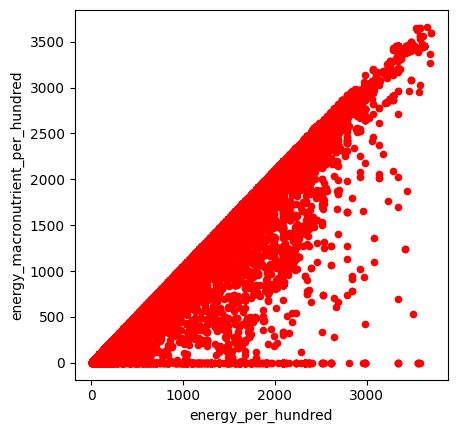

In [55]:
mask_macro_energy = (df['energy_per_hundred'] - energy_macronutrient)/energy_macronutrient > -0.05
df = df[mask_macro_energy]

df.plot(kind='scatter', x='energy_per_hundred', y='energy_macronutrient_per_hundred', color='r')
plt.axis('scaled')
plt.show()

In [56]:
df.shape

(235285, 92)

This filtering further reduced the number of entries from 286414 to 235285. This is a reduction of 18%.

__5. Outliers in few `..._per_hundred` columns__

We start by plotting again the histograms of these variables, but now in log-scale in order to better identify isolated outliers.

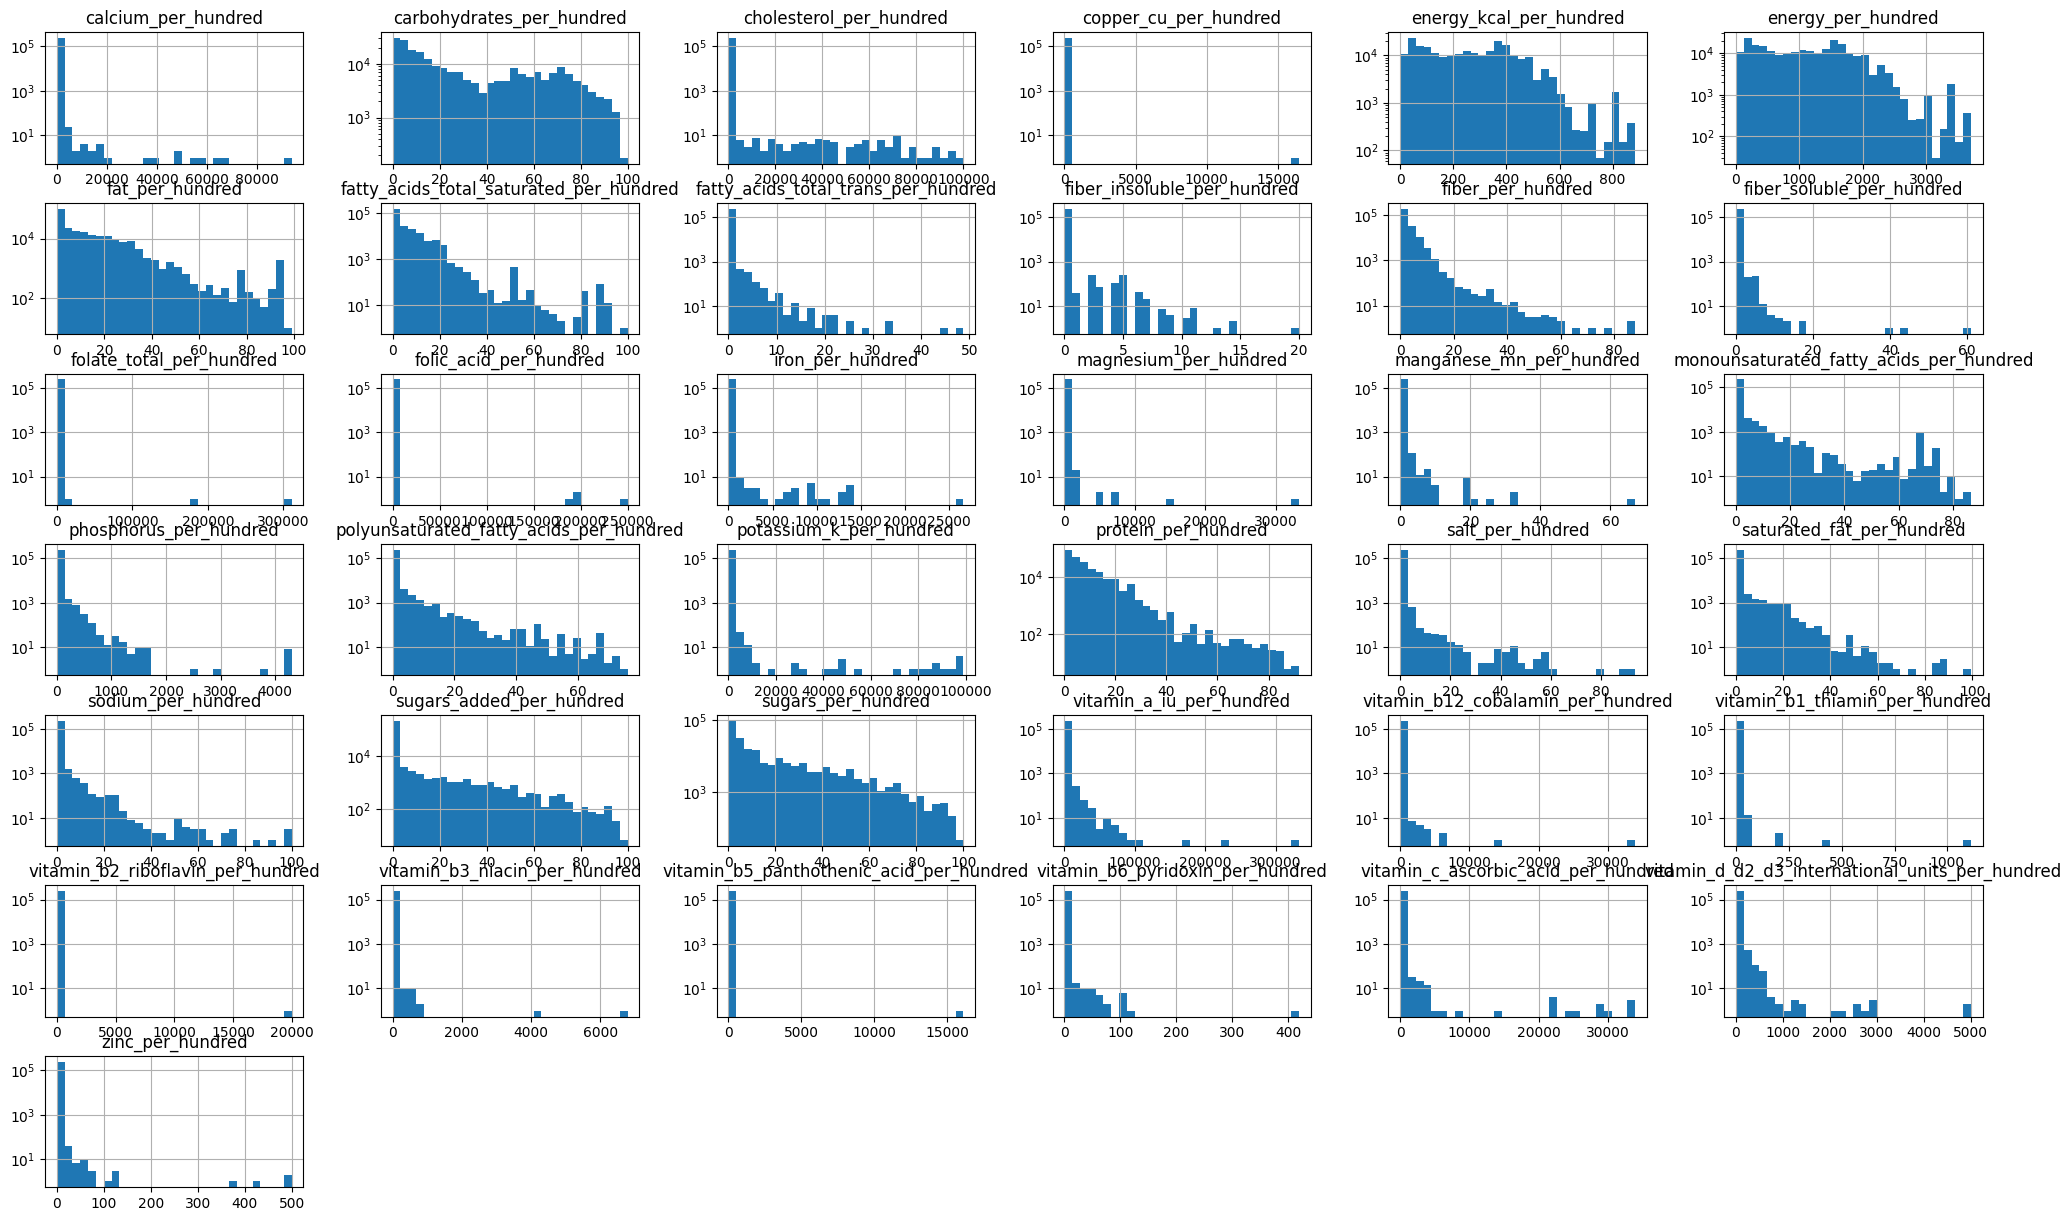

In [57]:
df[cols_per_hundred].hist(bins=30, figsize=(25,15), log=True)
plt.show()

__Observation__  
- For many variables, there are still "extreme" outlier points present in the data. E.g. `copper_cu_per_hundred`, `folate_total_per_hundred` and `folic_acid_per_hundred`, exhibit a few isolated points. 

__Decision__  
- For these columns we will apply a removal strategy based on the Z-score. The data points that are 2 standard deviations away from the mean will be excluded.

In [58]:
df.reset_index(inplace=True)
mask_outlier = pd.Series([True]*len(df))

cols = ['copper_cu_per_hundred','folate_total_per_hundred','folic_acid_per_hundred']

for col in cols:
    
    mask_outlier = (np.abs(df[col] - df[col].mean()) < (2 * df[col].std())) & mask_outlier

We next apply the outlier filtering and plot the again the histogram for the processed variables.

In [59]:
df = df.loc[mask_outlier]

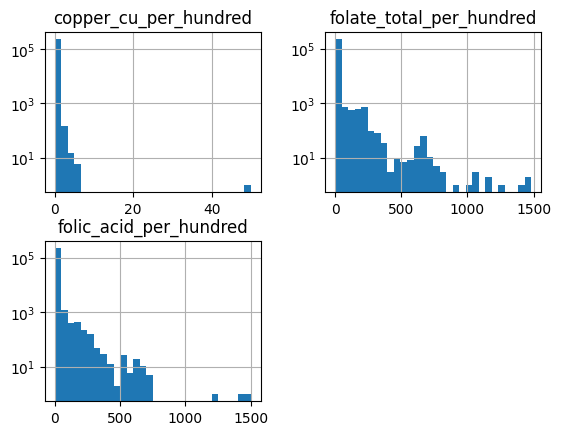

In [60]:
df[cols].hist(bins=30, log=True)
plt.show()

This has reduced by many orders of magnitude the range of values for these variables.

In [61]:
df.shape

(235270, 93)

This filtering further slightly reduced the number of products from 235285 to 235270. This is represents a reduction of 0.01%.

# D. EDA: Text data

Since we'll dealing with long text strings we change the lenght used for text display

In [62]:
# Change display option for max_colwidth
pd.set_option('display.max_colwidth', 200)

__1. Product with the longest ingredient list__

We start by having a look at some examples of ingredients text lists. 

In [63]:
df['ingredients_en'].sample(20)

102650                                  SUGAR, CORN SYRUP, CONFECTIONER'S GLAZE, SALT, GELATIN, HONEY, ARTIFICIAL FLAVOR, TITANIUM DIOXIDE [COLOR], CARAMEL COLOR, SESAME OIL, YELLOW 5, YELLOW 6, RED 3, BLUE 1.
95744     CRIMINI MUSHROOMS, MARINATED ARTICHOKE HEARTS (QUARTERED ARTICHOKE HEARTS, WATER, VEGETABLE OIL [SOYBEAN AND/OR SUNFLOWER OIL], VINEGAR, SPICES, SALT, CITRIC ACID AND ASCORBIC ACID TO PRESERVE COL...
81825     SKIM MILK, CREAM, COOKIE DOUGH (WHEAT FLOUR, FUDGE CHIPS [SUGAR, COCONUT OIL, FULLY HYDROGENATED COCONUT OIL, COCOA {PROCESSED WITH ALKALI}, SALT, SOY LECITHIN, NATURAL FLAVORS], SUGAR, BROWN SUGA...
222215    ENRICHED BLEACHED WHEAT FLOUR (WHEAT FLOUR, NIACIN, IRON, THIAMIN MONONITRATE, RIBOFLAVIN, FOLIC ACID), SUGAR, CANOLA, AND/OR SOYBEAN AND/OR PALM OIL, HIGH FRUCTOSE CORN SYRUP, CORN SYRUP, CONTAIN...
200362                    CHERRIES, WATER, CORN SYRUP, SUGAR, MALIC ACID, CITRIC ACID, NATURAL & ARTIFICIAL FLAVOR, POTASSIUM SORBATE AND SODIUM BENZOATE (PRESE

__Observation__  
There's a lack of consistency and a big variety on how the ingredients are listed and organized, which highly complicates the task of parsing the individual ingredients. The following issues are the main ones we have identified and are going to address:

1. Mixed usage of upper- and lower-case
2. The percentage content of ingredients is sometimes included. E.g. _'...organic whole milk __(13%)__...'_ or _'...__20%__ raspberry puree...'_;
3. Sometimes there's more textual information, with the ingredient list embedded within. E.g. '_Superior quality durum wheat Pasta\r\n\r\nIngredients:_ __Durum wheat, water__ ...';
4. Sometimes curved parenthesis are used to include lower-level ingredients or other information. E.g. _'vegetable oils __(palm, sunflower)__, sugar, yeast'_ or _'SODIUM CASEINATE __(A MILK DERIVATIVE)__**,'_
5. Sometimes different characters than a comma are used to separated ingredients. E.g. _'SEMOLINA (WHEAT)__;__ DURUM FLOUR (WHEAT)__;__ NIACIN'_
6. Sometimes the spurious character __\*__ is present _'raw cane sugar __*__ (Paraguay), coco'_


__Solution__  
We address these different issues by implementing the following rules in a `preprocess_text` function:
1. Convert all text to lower-case;
2. Remove all references to percentage content;
3. Identify string _'...Ingredients: '_ and keep only the text that comes after it;
4. Remove all sub-ingredients that appear within curved parenthesis;
5. Replace other separation characters with a comma.
6. Remove all punctuation character. E.g. '.' and '*'

Additionally:

- Use comma as the separator between the different ingredients since this is already used in most of entries;
- Replace the word ` and ` with a comma;

In [64]:
import re

# Define preprocess_text function
def preprocess_text(text):
    '''
    This function preprocesses raw samples of text:
    - Converts to lowercase
    - Replaces common punctuation marks with whitespace
    - Removes stop words
    - Splits text on whitespace
    
    INPUT:
    - text: "raw" text (string)
    
    OUTPUT:
    - processed_sample_tokens: list of tokens (list of strings)
    '''
    
    # Convert to lowercase
    clean_text = text.lower()

     # Replace the word 'and' with a comma
    clean_text = re.sub(r"\s+and\s+", ",", clean_text)
    clean_text = re.sub(r"\s+&\s+", ",", clean_text)


    # Catch reference to beginning of ingredient list inside string
    match = re.search(r'ingredients:\s*(.*?)[\r\n]', clean_text)
    clean_text = match.group(1) if match else clean_text

    # Remove percentage contents from string: e.g. (20.0%)
    clean_text = re.sub(r"\s*\(\d*.?\d*\s*%\)\s*"," ", clean_text)
    
    # Remove percentage contents from string: e.g. 20.0%
    clean_text = re.sub(r"\s*\d+.?\d*\s*%\s*"," ", clean_text)
    
    # Remove everything found inside parethensis
    clean_text = re.sub(r"\(([^)]+)\)","", clean_text)
  
   # Remove special spurious characters
    clean_text = re.sub(r"\.\*", "", clean_text)
        
    # Replace different separation punctuations marks with commas
    clean_text = re.sub(r"[;.]\s*", ",", clean_text)
    clean_text = re.sub(r"\s*[-]\s*", ",", clean_text)
   
    # Finally we split the resulting string in a list of ingredients
    # We also check to see if no empty string is selected, which would otherwise be
    processed_sample_tokens = [tok.lstrip().rstrip() for tok in clean_text.split(',') if tok != '']
    
   
    return processed_sample_tokens

Next, we test our `preprocess_text()` function to see how it performs for a few random products and respective ingredients text. For each entry, we first print the original text string, and below it the list of parsed ingredients.

In [65]:
import random

for n in random.sample(range(len(df)), 5):
    print('****************************************************************************************')
    print(f'{n:5d} >>>> {df.loc[n, "ingredients_en"]}')
    print('----------------------------------------------------------------------------------------')
    print(f'       >>>>', preprocess_text(df.loc[n, 'ingredients_en']))
#    print(preprocess_text(ingredients[n]))
    

****************************************************************************************
167926 >>>> ORGANIC WHOLE KERNEL RYE, WATER, ORGANIC WHOLE RYE FLOUR, ORGANIC SPELT, SEA SALT, YEAST.
----------------------------------------------------------------------------------------
       >>>> ['organic whole kernel rye', 'water', 'organic whole rye flour', 'organic spelt', 'sea salt', 'yeast']
****************************************************************************************
83637 >>>> POTATOES, VEGETABLE OIL (CONTAINS ONE OR MORE OF THE FOLLOWING: CANOLA, PALM, SOYBEAN, SUNFLOWER), DEHYDRATED POTATO, SALT, DISODIUM DIHYDROGEN PYROPHOSPHATE (TO PROMOTE COLOR RETENTION), DEXTROSE.
----------------------------------------------------------------------------------------
       >>>> ['potatoes', 'vegetable oil', 'dehydrated potato', 'salt', 'disodium dihydrogen pyrophosphate', 'dextrose']
****************************************************************************************
 8480 >>>

The generated ingredient list with the implemented pre-processing, despite not being perfect for all cases, still does a good job in parsing the ingredients list.

We next apply the `preprocess_text()` function to the ingredients column, and wrap it in a `lambda function` to further calculate the number of ingredients. This number is stored in a new column `df['number_ingredients']`. 

In [66]:
df['number_ingredients'] = df['ingredients_en'].apply(lambda x: len(preprocess_text(x)))
df[['product_name_en','ingredients_en', 'number_ingredients']].sort_values('number_ingredients',ascending=False).head(3)

,product_name_en,ingredients_en,number_ingredients
225232,"FRUIT SNACKS, BERRIES 'N CHERRIES, ISLAND FRUITS, FRUIT PUNCH, WHITE GRAPE RASPBERRY, APPLE ORCHARD MEDLEY, STRAWBERRY, TANGY FRUITS, CONCORD GRAPE","BERRIES 'N CHERRIES INGREDIENTS: FRUIT PUREE (PEAR, PEACH, STRAWBERRY, RASPBERRY, BLACKBERRY, BLUEBERRY AND CHERRY), CORN SYRUP, SUGAR, MODIFIED CORN STARCH, GELATIN, CITRIC ACID, LACTIC ACID, NAT...",138
155830,MINI DECADENT DESSERTS,"WATER, SUGAR, PALM OIL, HIGH FRUCTOSE CORN SYRUP, CORN SYRUP, COCOA (PROCESSED WITH ALKALI), MONO AND DIGLYCERIDES, POLYSORBATE 60, SALT, SOY LECITHIN, POTASSIUM SORBATE, CITRIC ACID, NATURAL AND ...",135
65022,"RUSSELL STOVER, CAKES, COOKIES & PIES ASSORTMENT","INGREDIENTS CONSIST OF WHITE CHOCOLATE {SUGAR, COCOA BUTTER, WHOLE MILK, SOY LECITHIN (AN EMULSIFIER), ARTIFICIAL FLAVOR, SALT}, CHOCOLATE {SUGAR, CHOCOLATE, CHOCOLATE PROCESSED WITH ALKALI, COCOA...",131


The product with the biggest number of ingredients (138) is called:

`FRUIT SNACKS, BERRIES 'N CHERRIES, ISLAND FRUITS, FRUIT PUNCH, WHITE GRAPE RASPBERRY, APPLE ORCHARD MEDLEY, STRAWBERRY, TANGY FRUITS, CONCORD GRAPE`

__2. Products with the shortest ingredients list__

To find the products with shortest ingredient list we start by filtering on the newly computed `number_ingredients` column on all entries that equal 1. However, this would select the many products for which the `ingredients_en` text column is filled with `ingredient_missing`. To avoid this, we previously assign the `number_ingredients` to 0 when `ingredients_en == "ingredient_missing"`. 

In [67]:
df.loc[df['ingredients_en']=='ingredient_missing', ['number_ingredients']] = 0

Next we calculate the total number of products with a single ingredient:

In [68]:
# Total number of products with a single idendified ingredient
len(df.loc[df['number_ingredients']==1])

11747

There are 11747 products with a single ingredient. So next, we show a few random examples of these products.

In [69]:
# Examples of products with a single ingredient
df.loc[df['number_ingredients']==1, ['product_name_en', 'ingredients_en']].sample(5)

,product_name_en,ingredients_en
118232,100% PURE SESAME OIL,SESAME SEED
68503,"WAYMOUTH FARMS, ORGANIC ITALIAN PINE NUTS",ORGANIC PINE NUTS.
148109,VEGETABLE AND POTATO SNACK,"VEGGIE STRAWS (POTATO STARCH, POTATO FLOUR, CORN STARCH, TOMATO PASTE, SPINACH POWDER, SALT, POTASSIUM CHLORIDE, SUGAR, TURMERIC, BEETROOT POWDER [COLOR], CANOLA OIL AND/OR SAFFLOWER OIL AND/OR SU..."
17323,Biozentrale - Agave syrup alternative sweetener,Concentrated agave juice
143878,BEEF RIBEYE STEAK,BEEF.


__3. Most frequent ingredients in products__

We start by using `preprocess_text` in all product entries and store the resulting lists in a python list. Next we flatten the list, and compute word frequency using the `Counter` module. The 20 most common ingredients are then shown as a list and also graphically as a bar plot.

In [70]:
# obtain list of ingredients list for all products
preprocessed_ingredients = [preprocess_text(text) for text in df['ingredients_en']]

# flatten the list to obtain a single list of all ingredients, including repeated ones.
from itertools import chain
preprocessed_ingredients = list(chain(*preprocessed_ingredients))

# compute the most frequents ones
from collections import Counter
ingredient_freq = Counter(preprocessed_ingredients).most_common(20)
ingredient_freq

[('salt', 112338),
 ('sugar', 87847),
 ('water', 85494),
 ('citric acid', 42010),
 ('corn syrup', 28280),
 ('natural flavor', 25590),
 ('soy lecithin', 23904),
 ('spices', 23582),
 ('natural', 21673),
 ('dextrose', 21099),
 ('xanthan gum', 20168),
 ('sea salt', 20145),
 ('soybean oil', 18514),
 ('natural flavors', 18499),
 ('artificial flavor', 16449),
 ('high fructose corn syrup', 15033),
 ('ingredient_missing', 14921),
 ('artificial flavors', 14328),
 ('whey', 14322),
 ('guar gum', 14155)]

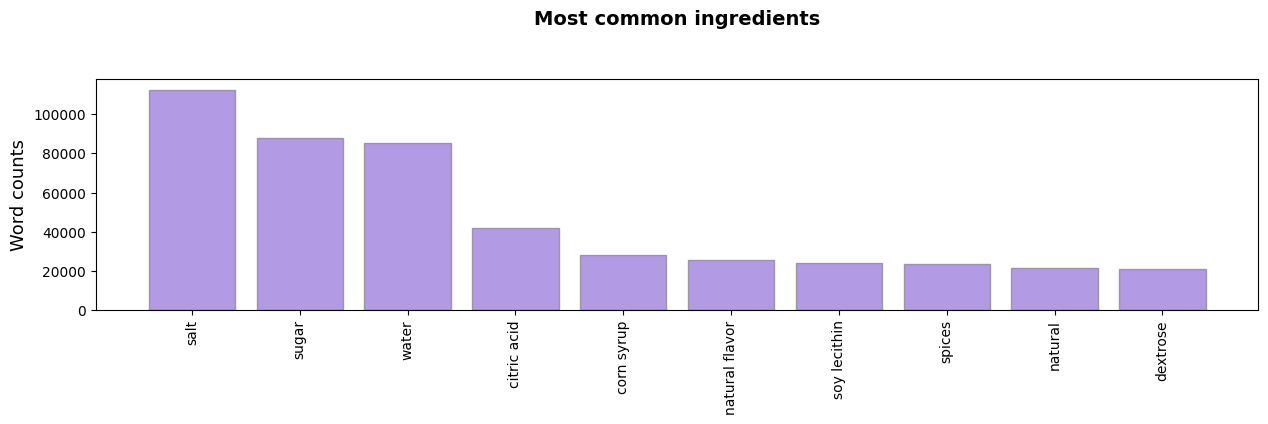

In [71]:
import matplotlib.pyplot as plt

# Plots top words
most_common_ingredients = ingredient_freq[:10]


# Barplot and font specifications
barplot_specs   = {"color": "mediumpurple", "alpha": 0.7, "edgecolor": "grey"}
title_specs     = {"fontsize": 14, "fontweight": "bold", "y": 1.2}
label_specs     = {"fontsize": 13}

plt.figure(figsize=(15,3))
plt.bar(*zip(*most_common_ingredients), **barplot_specs)
plt.title('Most common ingredients', **title_specs)
plt.ylabel('Word counts', **label_specs)
plt.xticks(rotation=90)
plt.show()

The most frequent ingredients seem rather expectable. The only issue is one named _'natural'_ which is due to a limitation of the preprocessing that has been applied

# E. EDA: Time-series data

__1. Correlation between the hour and month of product registration__

We create a new dataframe called `df_hourmonth` with the creation month and hour count data. The month and hour were derived from time-series obtained from the `created_at` variable, together with a `dummy` variable used to facilitate the counting of entries

In [72]:
# create time-series
create_dt = pd.to_datetime(df['created_at'])
# Extract hour and month from timeseries into columns of a new dataframe
df_hourmonth = pd.DataFrame({'hour':create_dt.dt.hour, 'month':create_dt.dt.month})
# Create dummy column with value 1 for eath item, to enable the grouping and summing while pivoting the talbe
df_hourmonth['dummy'] = 1
# Pivot dataframe such that result is ready to be plotted in heatmap
df_hourmonth = pd.pivot_table(df_hourmonth, 
                                    values='dummy',
                                    index=['month'], 
                                    columns=['hour'],
                                    fill_value=0, 
                                    aggfunc='sum')


df_hourmonth

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
month,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,2,30,79,126,...,42,24,11,12,1,6,2,0,1,0
2,0,0,0,0,0,0,0,5,85,69,...,41,25,7,7,2,11,9,56,0,0
3,0,0,0,0,0,0,2,30,107,158,...,133,155,39,71,5,15,424,8,0,0
4,0,0,0,0,10,76,52,151,87,120,...,94,27,12,14,3,105,12,150,0,0
5,0,0,1,0,0,0,15,54,84,55,...,64,41,12,22,15,18,0,0,0,0
6,0,0,0,0,0,1,191,103,107,130,...,210,124,68,444,148,5,16,40,507,3
7,349,92,0,0,0,1,730,151,57,51,...,58,127,727,229,201,411,956,439,366,286
8,3,1,2,1,0,1,10,48,57,73,...,48,45,53,37,43,50,31,10,4,2
9,0,0,0,0,0,28,310,87,84,156,...,64,167,1051,522,564,1016,5,309,0,0


As sanity check of the consistency of previous computations we verify that the accumulated total number of items in the `createcorr_df` is the same as the number of the rows in the original dataframe. 

In [73]:
df_hourmonth.sum().sum() == len(df)

True

Next, we plot a heatmap of this dataframe.

<Axes: xlabel='hour', ylabel='month'>

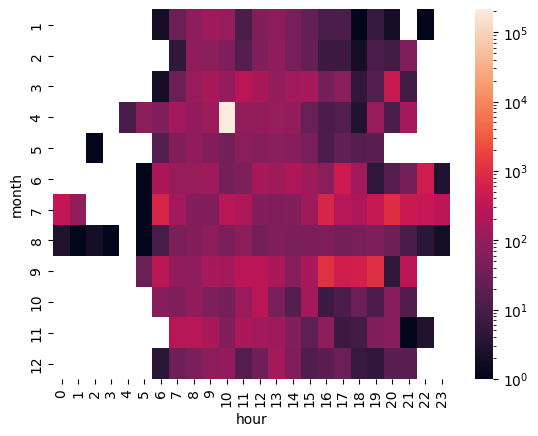

In [74]:
import seaborn as sns
from matplotlib.colors import LogNorm

sns.heatmap(df_hourmonth, norm=LogNorm())

This shows that there's a high number of items created on month 4 at hour 10 (we chose a log scale for making visible the different order of magnitude). This could have happened in a single year or over several years. The remaining item creation is relatively smothly distributed across all months and between hours ~6 and ~22.

__2. Evolution of total number of items over time__

We start by creating a dataframe with the index equal to the creation date (as a time-series) and columns equal to the different countries. Again we use the trick of a `dummy` column equal to 1 to facilitate the counting in the next step.

In [75]:
df_evolution = pd.DataFrame({'date': create_dt, 'country': df['country']})
df_evolution.set_index('date', inplace=True)
df_evolution['dummy'] = 1

#df_evolution['year-month'] = df_evolution.index.year+'_'+df_evolution.index.month

df_evolution = pd.pivot_table(df_evolution, 
                           values='dummy',
                           index=['date'], 
                           columns=['country'],
                           fill_value=0, 
                           aggfunc='sum')

df_evolution.head()

country,AT,CH,DE,FR,IT,UK,US
date,,,,,,,
2016-05-31 17:54:05.758000+00:00,0,1,0,0,0,0,0
2016-05-31 17:54:07.264000+00:00,0,1,0,0,0,0,0
2016-05-31 17:54:07.484000+00:00,0,1,0,0,0,0,0
2016-05-31 17:54:07.869000+00:00,0,1,0,0,0,0,0
2016-05-31 17:54:07.955000+00:00,0,1,0,0,0,0,0


Next we resample the dataframe so that the entries are summed over a periods of 1 month.

In [76]:
df_evolution = df_evolution.resample('M').agg('sum')
df_evolution.head()

country,AT,CH,DE,FR,IT,UK,US
date,,,,,,,
2016-05-31 00:00:00+00:00,0,16,0,0,0,0,0
2016-06-30 00:00:00+00:00,0,898,0,0,0,0,0
2016-07-31 00:00:00+00:00,0,5391,0,0,0,0,0
2016-08-31 00:00:00+00:00,0,23,0,0,0,0,0
2016-09-30 00:00:00+00:00,0,4436,0,0,0,0,0


We finally replace the index with a string containing only the year and the month, which is what we need for the evolution plot.

In [77]:
df_evolution['year-month'] = df_evolution.index.strftime('%Y-%m')
df_evolution.set_index('year-month', inplace=True)
df_evolution.head()

country,AT,CH,DE,FR,IT,UK,US
year-month,,,,,,,
2016-05,0,16,0,0,0,0,0
2016-06,0,898,0,0,0,0,0
2016-07,0,5391,0,0,0,0,0
2016-08,0,23,0,0,0,0,0
2016-09,0,4436,0,0,0,0,0


(7.0, 500000.0)

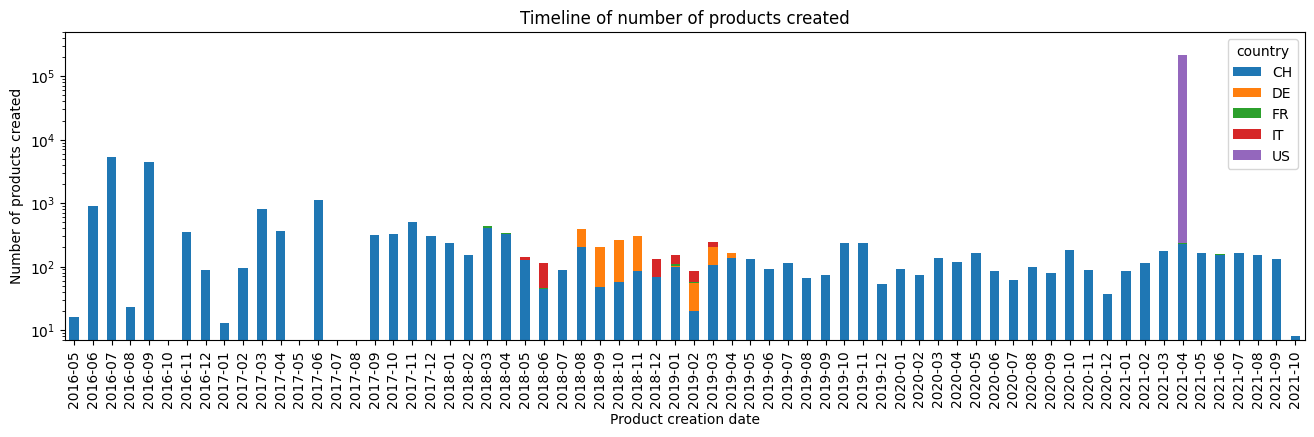

In [78]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df_evolution[['CH', 'DE', 'FR', 'IT', 'US']].plot(kind='bar', stacked=True, figsize=(16,4))

ax = plt.gca()
ax.set_yscale('log')
ax.set_xlabel('Product creation date')
ax.set_ylabel('Number of products created')
ax.set_title('Timeline of number of products created')
ax.set_ylim([0.7E1, 5E5])

__Observations__  
- The creation of products from Switzerland happens smoothly over the entire analysis period. 
- Products from Germanay and Italy were mainly added between 2018-06 and 2019-07
- In 2021-04 there's a huge addition of products from the USA (of the order of hundred thousand). This could maybe be due to a merge of databases or some change in regulations

# F. Correlation analysis

__1. Correlation between `energy_per_hundred` and the  remaining `per_hundred` columns__

In [79]:
pd.set_option('display.float_format', '{:.5f}'.format)
corr_series = df[cols_per_hundred].corrwith(df['energy_per_hundred'])
corr_series.sort_values(ascending=False)

energy_per_hundred                                 1.00000
energy_kcal_per_hundred                            0.99999
fat_per_hundred                                    0.75437
fatty_acids_total_saturated_per_hundred            0.52217
carbohydrates_per_hundred                          0.51846
sugars_per_hundred                                 0.32482
monounsaturated_fatty_acids_per_hundred            0.32096
polyunsaturated_fatty_acids_per_hundred            0.26928
protein_per_hundred                                0.23637
fiber_per_hundred                                  0.21908
saturated_fat_per_hundred                          0.19417
sugars_added_per_hundred                           0.14073
fatty_acids_total_trans_per_hundred                0.05315
folate_total_per_hundred                           0.04818
phosphorus_per_hundred                             0.04669
calcium_per_hundred                                0.04619
folic_acid_per_hundred                             0.039

__Observations__  
- The trivial correlation of 1 between `energy_per_hundred` and itself.
- The very high correlation with `energy_kcal_per_hundred`. This is expected, since both variables are linearly related, and after the correction we applied in previous exercises, this results in a  even  higher correlation factor.
- High positive correlation with fat and carbohydrates related features. This is also expected since these macronutrienst are known to have a  high energy content. 
- For the remaining features the correlation is either weak or null. 

__2. Nature of correlation between `energy_per_hundred` and the most/least correlated `per_hundred` columns__

Excluding the trivial correlation with energy_kcal_per_hundred, the 3 most correlated nutrients are (with coefficient in parenthesis):
- fat_per_hundred                          (0.75)
- carbohydrates_per_hundred                (0.52)
- fatty_acids_total_saturated_per_hundred  (0.52)

The 3 least correlated are:
- vitamin_b2_riboflavin_per_hundred        ( 0.0014)
- salt_per_hundred                         (-0.0012)
- vitamin_b5_panthothenic_acid_per_hundred (-0.0020)


In [80]:
cols_most_corr = ['fat_per_hundred', 'carbohydrates_per_hundred', 'fatty_acids_total_saturated_per_hundred']
cols_least_corr = ['vitamin_b2_riboflavin_per_hundred', 'salt_per_hundred', 'vitamin_b5_panthothenic_acid_per_hundred']

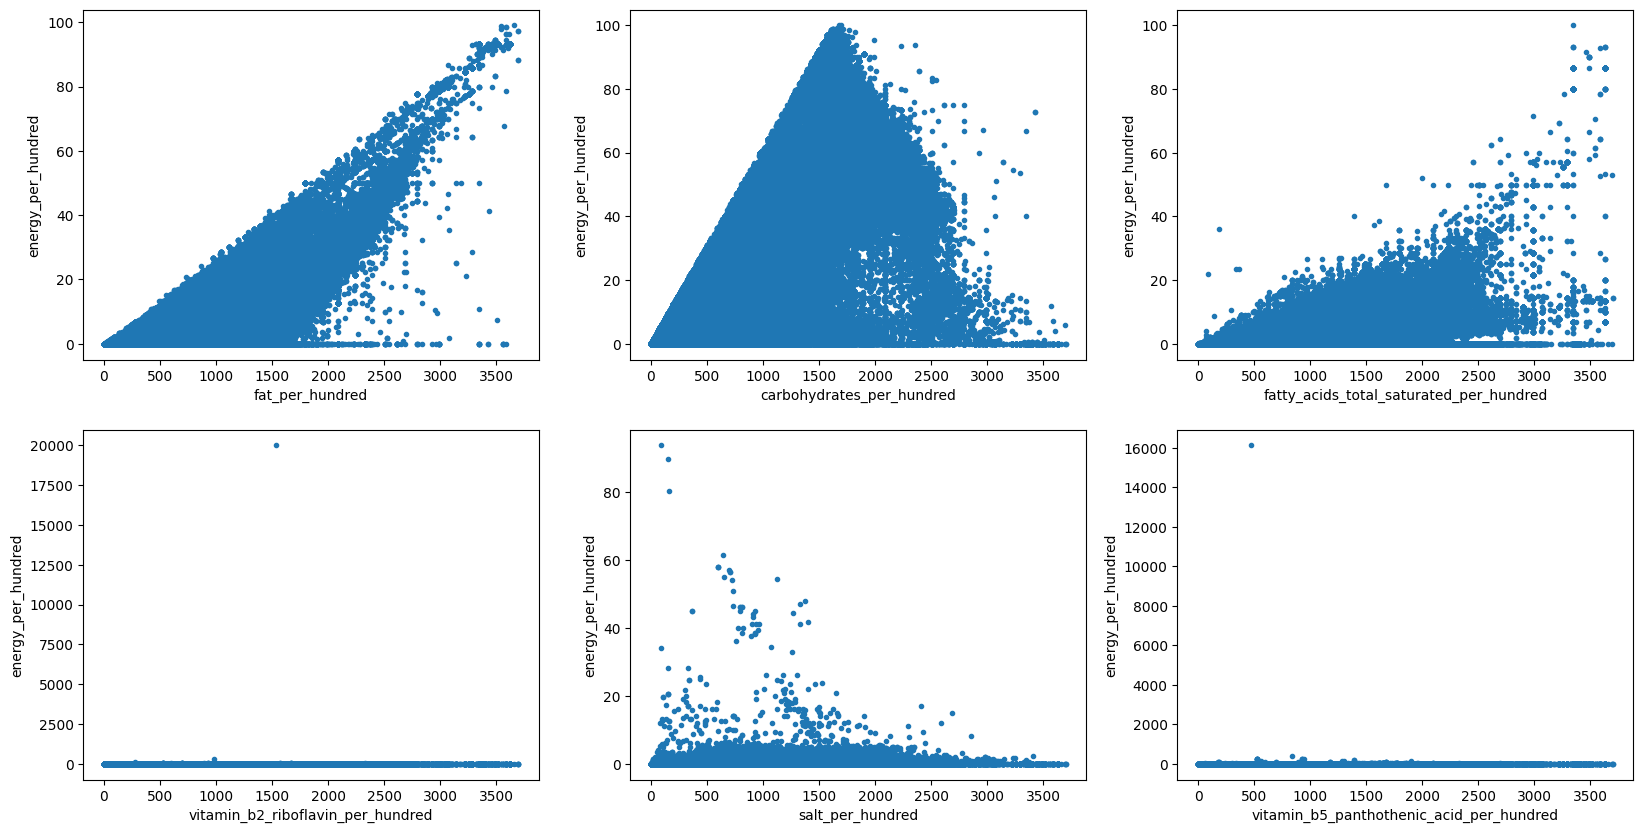

In [81]:
fig, ax = plt.subplots(2,3, figsize=(20,10))

for k in range(3):
    ax[0,k].scatter(df['energy_per_hundred'], df[cols_most_corr[k]], marker='.')
    ax[0,k].set_xlabel(cols_most_corr[k])
    ax[0,k].set_ylabel('energy_per_hundred')
    
for k in range(3):
    ax[1,k].scatter(df['energy_per_hundred'], df[cols_least_corr[k]], marker='.')
    ax[1,k].set_xlabel(cols_least_corr[k])
    ax[1,k].set_ylabel('energy_per_hundred')
    #ax[1,k].set_ylim([0,20])


__Observations__  
- For the most correlated nutrients, the relationship is not exactly linear, since there's a ceiling effect since the energy apported  by the nutrients cannot be greater than the total energy;
- Despite this it, the relation seems to be more linear for `fat_per_hundred` and `fatty_acids_total_saturated_per_hundred` than for `carbohydrates_per_hundred`;
- For the least correlated nutrients we observe no correlation, but some outliers are clearly visible that may affect the result;

__3. Test of independence two categorical variables__

We start by creating an energy content classification categorically variable using the pandas `pd.qcut()` function. We divide energy content into three categories, each holding an equal proportion of data points. 

In [82]:
categories = ['low energy', 'medium energy', 'high energy']
df['energy_category'] = pd.qcut(df['energy_per_hundred'], q=3, labels=categories)
df[['energy_per_hundred', 'energy_category']].head()

,energy_per_hundred,energy_category
0,1500.00000,high energy
1,1010.00000,medium energy
2,1679.00000,high energy
3,2470.00000,high energy
4,1524.00000,high energy


Next we comput the cross table, where the counts of the new `energy_category` variable is expressed in funcion of the `country`.

In [83]:
df_energycountry = pd.crosstab(df['country'], df['energy_category'], margins=True)
df_energycountry

energy_category,low energy,medium energy,high energy,All
country,,,,
AT,1,0,0,1
CH,6669,6318,7856,20843
DE,259,264,413,936
FR,15,20,14,49
IT,72,69,115,256
UK,1,0,0,1
US,71712,74344,67128,213184
All,78729,81015,75526,235270


We decide to drop the rows for countries `['AT', 'UK']`, since they only contain a single entry each.

In [84]:
df_energycountry = df_energycountry.drop(['AT', 'UK'], axis=0)
df_energycountry

energy_category,low energy,medium energy,high energy,All
country,,,,
CH,6669,6318,7856,20843
DE,259,264,413,936
FR,15,20,14,49
IT,72,69,115,256
US,71712,74344,67128,213184
All,78729,81015,75526,235270


Finally, we use the Chi-square test of independence to test whether the categorical variables `country` and `energy_category` are independent or not.

In [85]:
import scipy.stats as stats

chi_square, p_value, dof, matrix = stats.chi2_contingency(df_energycountry)
print(f'Chi-squared: {chi_square}')
print(f'p-value:     {p_value}')

Chi-squared: 440.3808171611339
p-value:     2.195480051359043e-84


The resulting `p-value` is so small that it's way smaller than the common significance level of 0.05. This allows us to reject the null hypothesis of the Chi-square test of independence, which means that with a very strong statistical significance, there's a dependency between the two variables. 

This dependency can be observed in the data, where for the two countries that contribute with more products we have:
- 'CH': 'medium energy' is category with least products;
- 'US':  'medium energy' is category with most products;

# G. Advanced EDA

__1. Total number of sample by country__

In [86]:
df.shape

(235270, 95)

We start by computing the number of entries per country, and also the respective proportion in percentage. 

In [87]:
df_country = df.value_counts('country').to_frame(name='product_all')
df_country['prop_all'] = df_country['product_all'] / len(df) * 100
df_country

,product_all,prop_all
country,,
US,213184,90.61249
CH,20843,8.85918
DE,936,0.39784
IT,256,0.10881
FR,49,0.02083
AT,1,0.00043
UK,1,0.00043


__Observation__  
- The 'US' provides the bulk of the dataser with 91% of entries;
- 5 countries contribute with less than 1% of entries each;

__Decision__
- Remove all entries for countries with less than 1% of entries in the dataset. This will leave us with products from 'US' and 'CH' alone.

In [88]:
mask_country = df_country[df_country['prop_all'] > 1].index
mask_country

Index(['US', 'CH'], dtype='object', name='country')

In [89]:
df_country = df_country.loc[mask_country,:]
df = df.loc[df['country'].str.contains('|'.join(mask_country))]
df.shape

(234027, 95)

This filtering reduced the number of products from 235270 to 234027. This is represents a reduction of 0.5%.

__2. Number of organic and non-organic products__

To identify the entries that can be classified as organic/bio products, we look into the `product_name_xx` column, in the several available languages, and look for the presense of the sub-string `organic` or `bio`. We also make sure that the string search is case independent.

In [90]:
mask_organic =  df['product_name_en'].str.contains('|'.join(['organic','bio']), case=False) |\
                df['product_name_fr'].str.contains('|'.join(['organic','bio']), case=False) |\
                df['product_name_de'].str.contains('|'.join(['organic','bio']), case=False)
mask_organic.sum()

11576

There are 11576 products that we classify as organic/bio. We next create a dataframe containing only these products.

In [91]:
df_organic = df[mask_organic]
df_organic[['product_name_en','product_name_fr','product_name_de']].sample(5)

,product_name_en,product_name_fr,product_name_de
133666,ORGANIC BASIL LINGUINE,NaN,NaN
145999,ORGANIC MAYONNAISE,NaN,NaN
29642,"LATE JULY, ORGANIC MINI BITE SIZE SANDWICH CRACKERS, CHEDDAR CHEESE",NaN,NaN
17147,BIO PLANÈTE Deodorized coconut oil,BIO PLANÈTE Huile de coco désodorisée,NaN
97358,ORGANIC NONFAT GREEK YOGURT,NaN,NaN


Next, we obtain the number organic/bio products per country. For this, we expand the previously obtained table containing all products per country, `df_country`, and we add the following counts and ratios: 
- Column `organic`: (total number of organic products per country)
- Column `prop_organic`: (number of organic products per country) / (total number of organic products for all countries)
- Column `prop_organic_in_country`: (number of organic products per country) / (total number of products from same country)

In [92]:
df_country['organic'] = df_organic['country'].value_counts()
df_country['prop_organic'] = df_country['organic'] / len(df_organic) * 100
df_country['prop_organic_in_country'] = df_country['organic'] / df_country['product_all'] * 100
df_country

,product_all,prop_all,organic,prop_organic,prop_organic_in_country
country,,,,,
US,213184,90.61249,10379,89.65964,4.86856
CH,20843,8.85918,1197,10.34036,5.74294


__Observation__  
- Both the USA and Switzerland provide a similar percentage of organic products, with 4.9% and 5.7% respectively.
- For columns `prop_all` and `prop_organic` the percentages don't exactly add up to 100% because we have removed the products which contributed with less than 1%.  

__3. Comparison of macronutriens distribution between organic and non-organic products per contry__

We start by creating a new bolean column, `organic`, which indicates whether a product is classified as being organic/bio or not.

In [93]:
df['organic'] = np.where(mask_organic, True, False)
df[['product_name_en', 'organic']].sample(10)

,product_name_en,organic
185269,KETTLE CHIPS,False
106961,VEGGIES & CHEESE,False
221065,"BUTTER MINTS, BUTTER",False
92682,MEXICAN COOKING SAUCE,False
226449,"DARK CHOCOLATE FROSTY BLUE, DARK BLUE",False
31569,"ROLAND, MANGO SLICES IN LIGHT SYRUP",False
178517,MICHIGAN HARD CIDER,False
36770,MINI VANILLA WAFERS COOKIES,False
138068,REAL ICE CREAM,False
21088,Coop Betty Bossi - Mixed salad with chicken,False


In [94]:
cols_macro = ['fat_per_hundred', 'protein_per_hundred', 'carbohydrates_per_hundred']

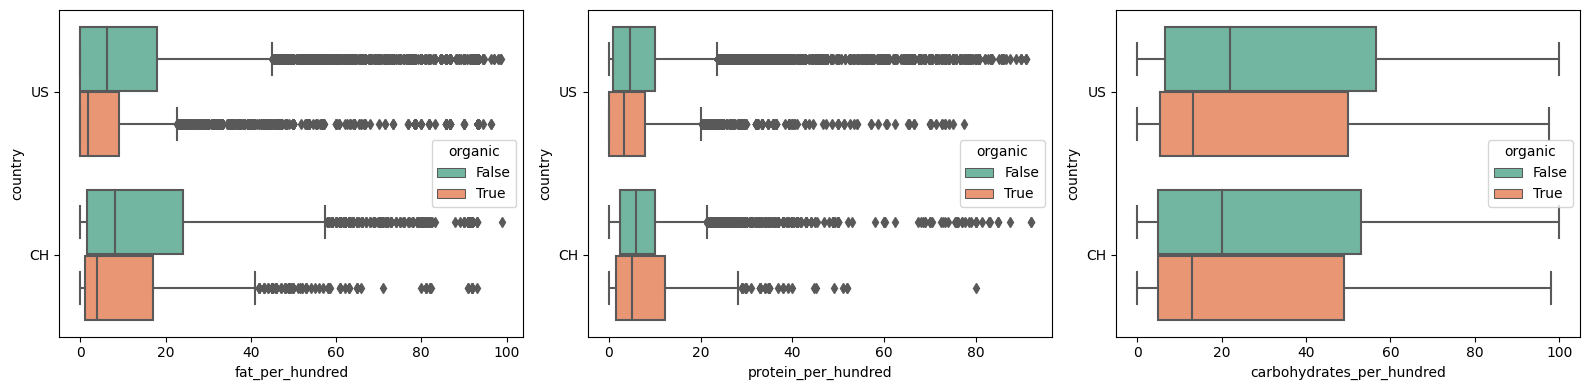

In [95]:
# Create a figure with 3 x 2 subplots
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(16, 4))

# Loop through these features and plot entries from each feature against `Latitude`
for col, ax in zip(cols_macro, axes.ravel()):
    sns.boxplot(
        data=df,
        x=col,
        y='country',
        order=['US', 'CH'],
        ax=ax,
        palette="Set2",
        hue='organic',
    )

plt.tight_layout()

__Observations:__

- For both countries, the organic products have consistently lower quantities of fat and carbohydrates than non-organic products.
- For the protein content, the difference is much weaker, but still slightly lower for organic products.
- No significant differences are observed between the products with Swiss or USA origin. This is true both for organic and non-organic products.